<a href="https://colab.research.google.com/github/kamalmukhalalaty/Kaggle-Salary-Predictions/blob/main/Kaggle_Salary_Data_Exploration_%26_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
import statistics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# The following line is needed to show plots inline in notebooks
%matplotlib inline 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Kaggle_Salary.csv to Kaggle_Salary.csv


# 1. Data cleaning:

While the data is made ready for analysis, several values are missing, and some features are  categorical. Note that some values that appear “null” indicate that a survey respondent did not select  that given option from a multiple-choice list. For example – “Which of the following hosted  notebooks have you used at work or school in the last 5 years? (Select all that apply) - Selected  Choice - JupyterHub/Binder” 
For the data cleaning step,I will handle missing values however I see fit and justify my approach. 

Key working points:
- examine which values are missing why.
- impute these values 
  - filling the missing values with a certain value (e.g. mode  for categorical data)
  - completely removing the features with missing values.
- converting  categorical data into numerical data by encoding (Ordinal vs. Coordinal data)

In [ ]:
df= pd.read_csv('Kaggle_Salary.csv')
pd.options.display.max_colwidth = 200 # to get acess to more details
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,73,77,81,94,96,109,114,115,130,139,146,147,153,154,167,171,175,180,193,206,212,219,224,228,231,232,245) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,...,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions,"Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run the data infrastructure that my business uses for storing, a...",Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build prototypes to explore applying machine learning to new areas,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run a machine learning service that operationally improves my pr...,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Experimentation and iteration to improve existing ML models,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Do research that advances the state of the art of machine learning,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - None of these activities are an important part of my role at work,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Other,Select any activities that make up an important part of your role at work: (Select all that apply) - Other - Text,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Twitter (data science influencers),Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Hacker News (https://news.ycombinator.com/),"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Reddit (r/machinelearning, r/datascience, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (forums, 

In [ ]:
df.shape

(12498, 248)

### Exploratory Data Analysis

In [ ]:
# Exploratory data analysis, 
# Summarizing the dataset's main characteristics:
# To see statistics on non-numerical features , 
# I will explicitly indicate data types of interest in the include parameter.
df.describe(include=['object', 'bool'])

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,...,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_buckets
count,12498,12498,12498,12498,12498,12498,12498,12498,12498,12498,12498,5980,3508,4891,3286,3635,2304,516,240,12498,12498,12251,2786,1387,2405,7758,2818,5117,1645,7334,3495,1882,375,884,12498,2279,6488,2440,2979,558,...,451,419,582,587,373,439,401,266,316,570,4314,226,12498,499,278,192,172,177,466,757,280,29,134,5176,133,12498,3123,2161,1528,1853,1193,548,589,416,480,527,1246,288,12498,12497
unique,4326,12,5,28,60,8,11,884,6,8,7,2,2,2,2,2,2,2,2,139,26,7,2,2,2,2,2,2,2,2,2,2,2,2,463,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,126,2,2,2,2,2,2,2,2,2,2,2,2,83,2,2,2,2,2,2,2,2,2,2,2,2,169,15
top,449,25-29,Male,-1,India,Master’s degree,Data Scientist,-1,0-49 employees,20+,We are exploring ML methods (and may one day put a model into production),Analyze and understand data to influence product or business decisions,"Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Build prototypes to explore applying machine learning to new areas,Build and/or run a machine learning service that operationally improves my product or workflows,Experimentation and iteration to improve existing ML models,Do research that advances the state of the art of machine learning,None of these activities are an important part of my role at work,Other,-1,$0-999,$0 (USD),Twitter (data science influencers),Hacker News (https://news.ycombinator.com/),"Reddit (r/machinelearning, r/datascience, etc)","Kaggle (forums, blog, social media, etc)","Course Forums (forums.fast.ai, etc)","YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digressions, etc)","Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)","Journal Publications (traditional publications, preprint journals, etc)","Slack Communities (ods.ai, kagglenoobs, etc)",None,Other,-1,Udacity,Coursera,edX,DataCamp,DataQuest,...,SAS,Cloudera,Azure Machine Learning Studio,Google Cloud Machine Learning Engine,Google Cloud Vision,Google Cloud Speech-to-Text,Google Cloud Natural Language,RapidMiner,Google Cloud Translation,Amazon SageMaker,None,Other,-1,Google AutoML,H20 Driverless AI,Databricks AutoML,DataRobot AutoML,Tpot,Auto-Keras,Auto-Sklearn,Auto_ml,Xcessiv,MLbox,None,Other,-1,MySQL,PostgresSQL,SQLite,Microsoft SQL Server,Oracle Database,Microsoft Access,AWS Relational Database Service,AWS DynamoDB,Azure SQL Database,Google Cloud SQL,None,Other,-1,"0-9,999"
freq,20,3075,10473,8385,2477,5868,3640,7627,3530,2896,2636,5979,3507,4890,3285,3634,2303,515,239,8315,1513,4038,2785,1386,2404,7757,2817,5116,1644,7333,3494,1881,374,883,8028,2278,6487,2439,2978,557,...,450,418,581,586,372,438,400,265,315,569,4313,225,8302,498,277,191,171,176,465,756,279,28,133,5175,132,8357,3122,2160,1527,1852,1192,547,588,415,479,526,1245,287,8260,4040


In [ ]:
#One point summaries of each col:
df.describe() # why does only Q10 come up here? because it is the only numerical col

,Q10_Encoded
count,12497.000000
mean,3.920061
std,4.188416
min,0.000000
25%,0.000000
50%,2.000000
75%,7.000000
max,14.000000


**Removing the extreme outliers from the distribution of the time taken to complete the survey as people might have not seriously taken the time to answer each question**

In [ ]:
y = df['Time from Start to Finish (seconds)'][1:].astype(float)
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
print(str(y[removed_outliers].size) + " data points remain.") 

index_names = y[~removed_outliers].index # INVERT removed_outliers!!
df.drop(index_names, inplace=True)

11251 data points remain.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Time from Start to Finish (seconds) Box Plot')

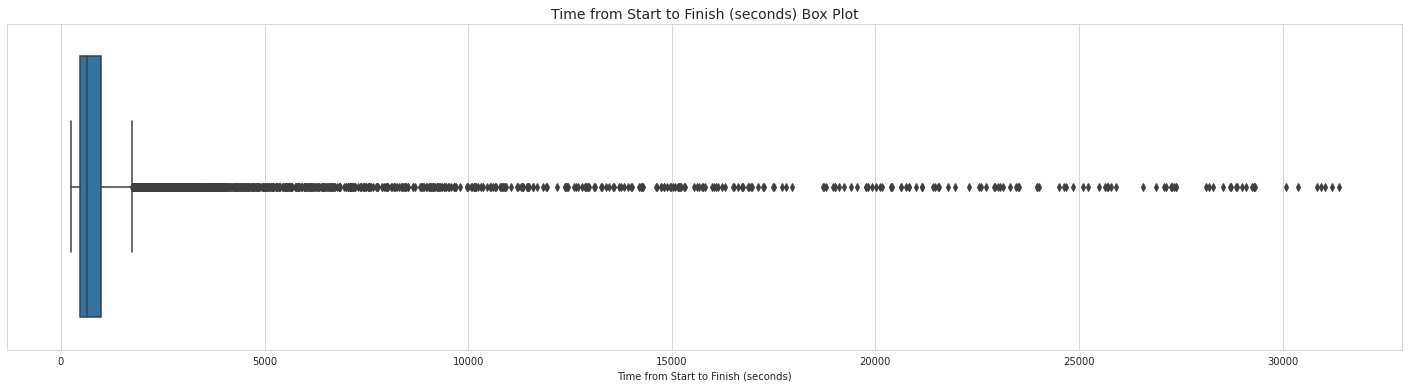

In [ ]:
plt.figure(figsize=(25, 6))
p=sns.boxplot(df['Time from Start to Finish (seconds)'][1:].astype(float))
p.set_title('Time from Start to Finish (seconds) Box Plot', fontsize=14)

**Evaluate the distribution of the target variable**

In [ ]:
df.Q10_buckets.unique()

array([nan, '30,000-39,999', '0-9,999', '>250,000', '60,000-69,999',
       '10,000-19,999', '80,000-89,999', '70,000-79,999', '90,000-99,999',
       '125,000-149,9991', '40,000-49,999', '20,000-29,999',
       '100,000-124,999', '150,000-199,999', '200,000-249,999',
       '50,000-59,999'], dtype=object)

**Fixing a typo**

In [ ]:
df.Q10_buckets[df.Q10_buckets=='125,000-149,9991']="125,000-149,999"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Salary Bracket Distribution of Survey Participants')

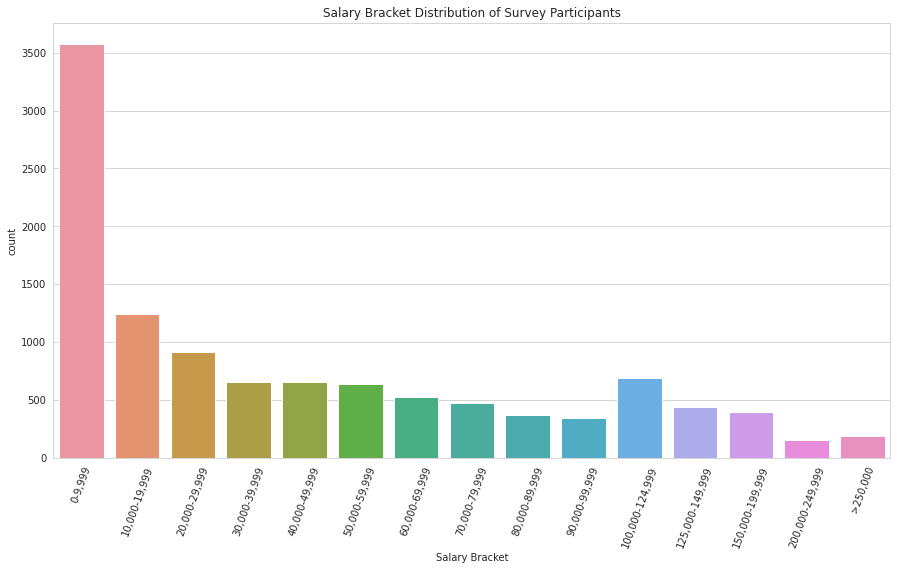

In [ ]:
plt.figure(figsize=(15,8))
g=sns.countplot(x=df.loc[1:,'Q10_buckets'],data=df.drop(index=0), order=['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999', '70,000-79,999' , '80,000-89,999', '90,000-99,999',  '100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999','>250,000'])
plt.xticks(rotation=70)
plt.xlabel("Salary Bracket")
plt.title("Salary Bracket Distribution of Survey Participants")

The distribution of salaries is very skewed with a very high number of data points for the lowest salary bracket as well as a "bump" in observations at the 100-125k salary bracket. 

This could be due to the high number of respondents from various developping countries with a lower average/median salary (eg. India, which has a large number of survey participants as well). 

the bump at the 100-125k salary bracket could also be the basis of a somehwat normal distribution of salaries for the US alone.

to investgiate this further I have created the following plots

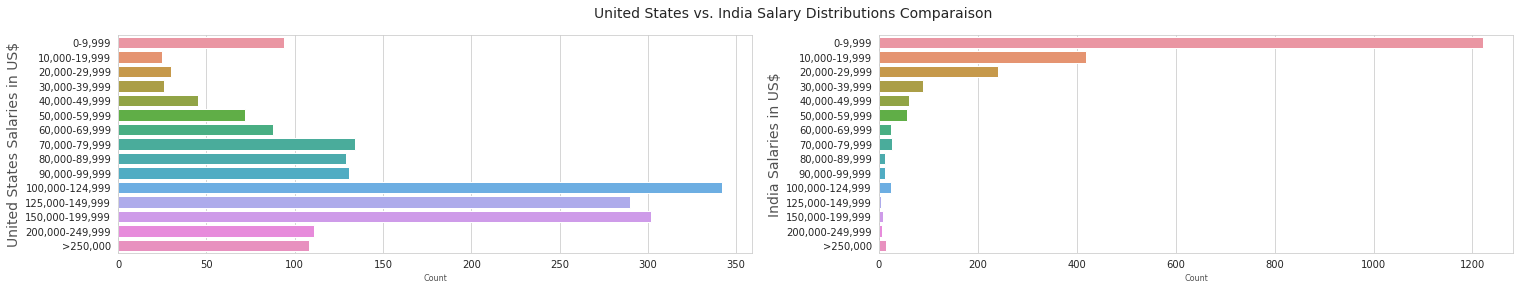

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(25,4),)
us_data = df[df['Q3']=="United States of America"]
sns.countplot(y='Q10_buckets',data = us_data, ax=ax[0], order=['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999', '70,000-79,999' , '80,000-89,999', '90,000-99,999',  '100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999','>250,000'])

ax[0].set_xlabel("Count",size=8,alpha=0.8)
ax[0].set_ylabel("United States Salaries in US$",size=14,alpha=0.8)
fig.suptitle('United States vs. India Salary Distributions Comparaison', fontsize=14)
india_data = df[df['Q3']=="India"]
sns.countplot(y='Q10_buckets',data = india_data,ax=ax[1],order=['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999', '70,000-79,999' , '80,000-89,999', '90,000-99,999',  '100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999','>250,000'])

ax[1].set_xlabel("Count",size=8,alpha=0.8)
ax[1].set_ylabel("India Salaries in US$",size=14,alpha=0.8)
fig.show()

Looking at this we can validate that there is somewhat normal distribution of salaries around 125-150k for the US alone with what could be some outliers in the 0-9,999 salrary bracket; and a skewed distrubtion at 0-10000 for indian respondants alone with some outliers at the >250,000$ salary bracket.

Geography has a large impact on salary, but is not fairly captured due to have variablibility in sample sizes. 

eg. if a country is represented by only one or two respondents, this isn’t enough to justify giving the country its own coefficient. In this case, even broad regional aggreagated coefficients (e.g., “Asia” or “Eastern Europe”) will significantly affect the accuracy of the model since economic differences within a region are huge. 

Ideally, I would replace the country column by GDP per capita. While GDP itself doesn’t translate to salary, it can serve a proxy function for geographic salary variation.

**Looking at the effect of education levels**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'India Salaries in US$')

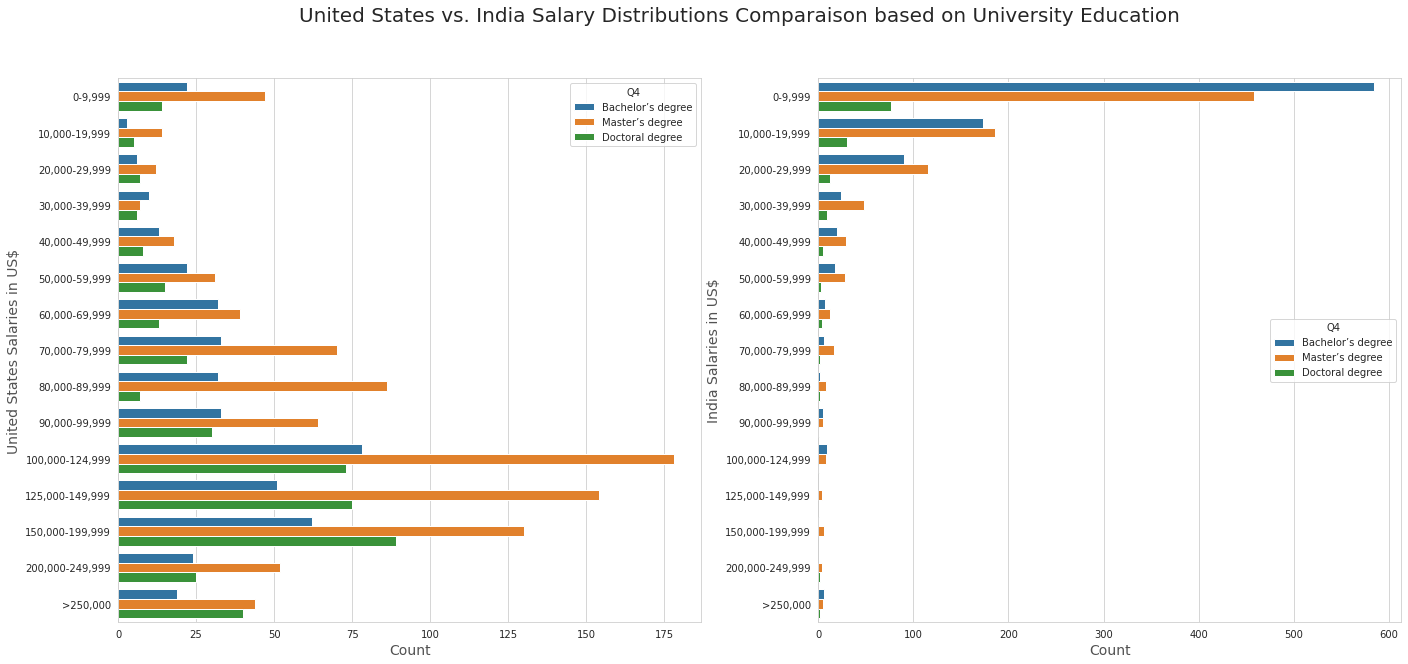

In [ ]:
data1 = df[df['Q4']!= "I prefer not to answer"][1:]
data2 = data1[data1['Q4']!="No formal education past high school"]
data3 = data2[data2['Q4']!="Professional degree"]
data4 = data3[data3['Q4']!="Some college/university study without earning a bachelor’s degree"]
exp_ordered = ['Bachelor’s degree','Master’s degree','Doctoral degree']
data4['Q4'] = pd.Categorical(data4['Q4'], exp_ordered)


fig, ax =plt.subplots(1,2, figsize=(23,10))
us_data = data4[data4['Q3']=="United States of America"]
sns.countplot(y='Q10_buckets',data = us_data, hue='Q4', ax=ax[0], order=['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999', '70,000-79,999' , '80,000-89,999', '90,000-99,999',  '100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999','>250,000'])
ax[0].set_xlabel("Count",size=14,alpha=0.8)
ax[0].set_ylabel("United States Salaries in US$",size=14,alpha=0.8)
fig.suptitle('United States vs. India Salary Distributions Comparaison based on University Education', fontsize=20)
india_data = data4[data4['Q3']=="India"]
sns.countplot(y='Q10_buckets',data = india_data, hue='Q4',ax=ax[1],order=['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999', '70,000-79,999' , '80,000-89,999', '90,000-99,999',  '100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999','>250,000'])
ax[1].set_xlabel("Count",size=14,alpha=0.8)
ax[1].set_ylabel("India Salaries in US$",size=14,alpha=0.8)

Seeing this makes me happy to be taking my masters

**Some aditional plots**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

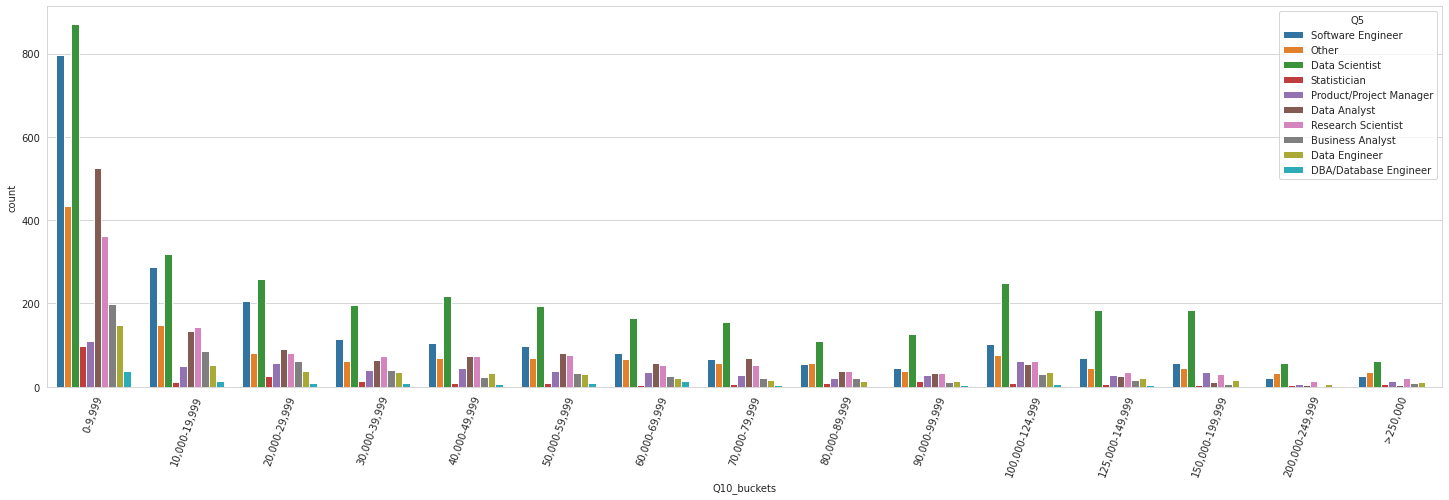

In [ ]:
plt.figure(figsize=(25,7))
g=sns.countplot(x=df.loc[1:,'Q10_buckets'],data=df.drop(index=0), hue=df.loc[1:,'Q5'], order=['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999', '70,000-79,999' , '80,000-89,999', '90,000-99,999',  '100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999','>250,000'])
#g=sns.countplot(x='Q10_buckets',data=df, hue='Q2')
plt.xticks(rotation=70)

We see that data scientist is the most popular occupation in each salary bracket 

**Understanding the sex distribution in survey participants**

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

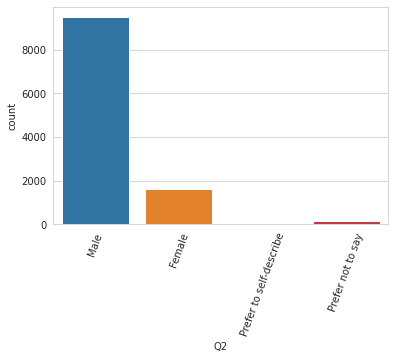

In [ ]:
ind=df.columns[2]
g=sns.countplot(x=ind,data=df.drop(index=0))
plt.xticks(rotation=70)

heavily skewed towards male participants.

###Missing values at frist glance 

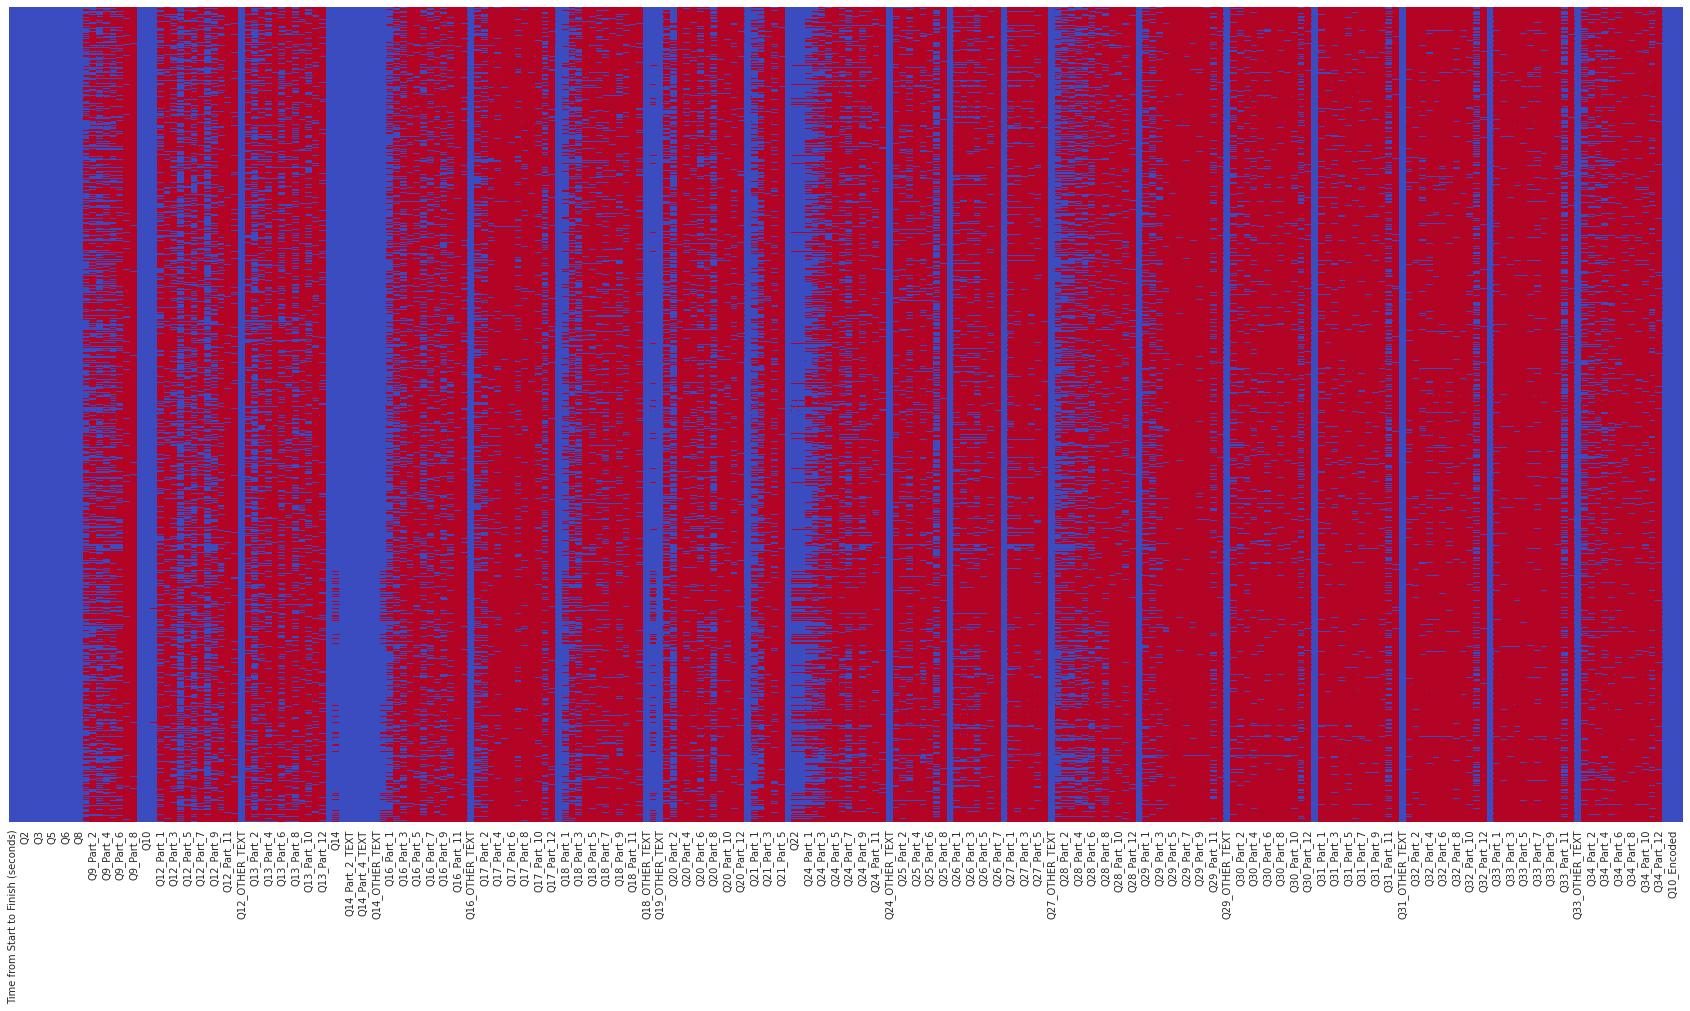

In [ ]:
# heatmap of untouched dataset.. allot of work to do
fig, ax = plt.subplots(figsize=(30,15))
sns.heatmap(df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

###Multiple Choice data


**Drop OTHER multiple choice entries**





In [ ]:
# Create dataframe for understanding questions
questions=pd.DataFrame(data=df.iloc[0,:])

In [ ]:
# look at the number of unique entries in every column
filt=df.describe(include='all').loc['unique',:]
pd.options.display.max_rows = 500
filt

Time from Start to Finish (seconds)    3514
Q1                                       12
Q2                                        5
Q2_OTHER_TEXT                            23
Q3                                       60
Q4                                        8
Q5                                       11
Q5_OTHER_TEXT                           812
Q6                                        6
Q7                                        8
Q8                                        7
Q9_Part_1                                 2
Q9_Part_2                                 2
Q9_Part_3                                 2
Q9_Part_4                                 2
Q9_Part_5                                 2
Q9_Part_6                                 2
Q9_Part_7                                 2
Q9_Part_8                                 2
Q9_OTHER_TEXT                           133
Q10                                      26
Q11                                       7
Q12_Part_1                      

The other text columns apear to have a very large amount of unique entries. this coupled with their numerical and undecernable nature make them a nucence to engineer into informative features. for this reason we will filter them out of our final dataframe.

Looking at the above list. a cutoff of 23 was chosen as the OTHER_TEXT colum with the least amount of unique entries was Q2_OTHER_TEXT with 23 unique entries.

Q3 (In which country do you currently reside?) contains 60 Unique Characters. 1 hot Encoding the feature would result in the introduction of 59 new columns. For that reason, it will also be filtered out of the dataframe. {This may be revisited as the feature intutivily appears to have informative merit}

EDIT Q3 will be re-added for analysis, as I found some time to do the extra work

In [ ]:
non_other=filt[filt<23]
ndf=df[non_other.index]

# remove question row
ndf=df[non_other.index].drop(index=0) 

# remove Q10_buckets
ndf.drop('Q10_buckets', 1, inplace=True)

# remove Q10
# ndf.drop('Q10', 1, inplace=True)

# add Q10_Encoded
ndf['Q10_Encoded']=df['Q10_Encoded']
ndf.loc[1:,'Q10_Encoded'] = ndf.loc[1:,'Q10_Encoded'].astype(int)

# re-add countries 

ndf['Q3']=df['Q3'][1:]

# go back to OG settings
pd.options.display.max_rows = 60 

ndf.head()

,Q1,Q2,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,...,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded,Q3
1,22-24,Male,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)","Journal Publications (traditional publications, preprint journals, etc)",NaN,NaN,NaN,NaN,Coursera,NaN,DataCamp,NaN,Kaggle Courses (i.e. Kaggle Learn),NaN,Udemy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,France
2,40-44,Male,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., models in production for more than 2 years)",Analyze and understand data to influence product or business decisions,"Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Build prototypes to explore applying machine learning to new areas,Build and/or run a machine learning service that operationally improves my product or workflows,NaN,NaN,NaN,NaN,"> $100,000 ($USD)",NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digressions, etc)","Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)",NaN,NaN,NaN,NaN,NaN,Coursera,NaN,DataCamp,NaN,Kaggle Courses (i.e. Kaggle Learn),NaN,Udemy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,India
3,40-44,Male,Master’s degree,Other,"> 10,000 employees",20+,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, Linear Digressions, etc)","Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)","Journal Publications (traditional publications, preprint journals, etc)","Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN,NaN,Coursera,edX,DataCamp,NaN,NaN,NaN,NaN,NaN,University Courses (resulting in a university degree),NaN,NaN,...,NaN,NaN,NaN,NaN,Azure Machine Learning Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,14,Australia
4,22-24,Male,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0 (USD),NaN,NaN,NaN,NaN,NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)",NaN,"Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)",NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,India
5,50-54,Male,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., models in production for more than 2 years)",NaN,NaN,Build prototypes to explore applying machine learning to new areas,NaN,NaN,Do rese

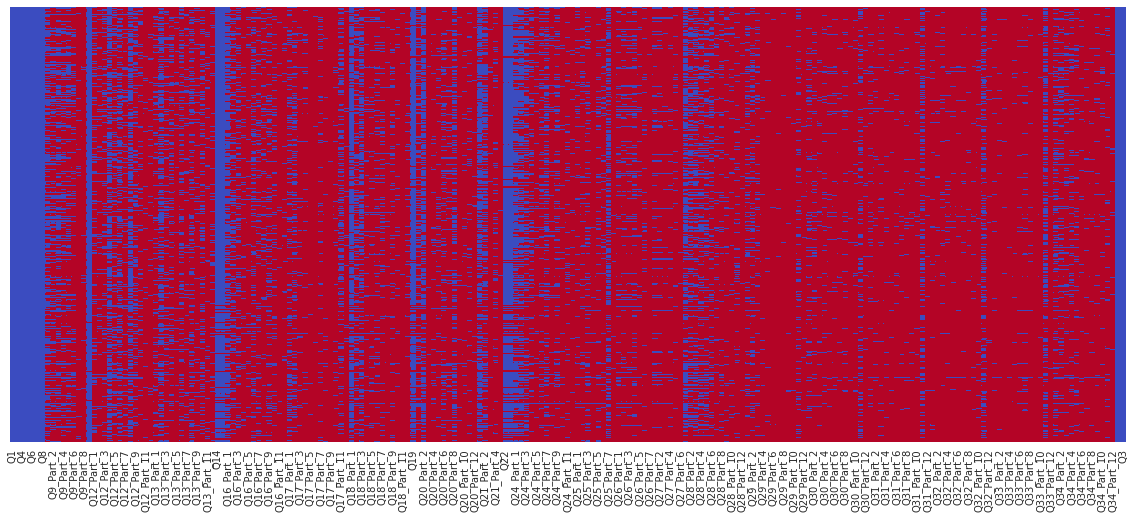

In [ ]:
#Check to see change in heeatmap
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(ndf.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

Allot more work to do! Must clean up multiple choice data

### Encode Multiple Choice 

In [ ]:
# filter out multiple choice answers (cols with only 1 unique entry string)
filt=ndf.describe(include='all').loc['unique',:]
multi=filt[filt==1]

# replace all null with 0 and non null with 1
for i in range(len(multi)):
  ndf.at[ndf[multi.index[i]].isnull(), multi.index[i]] = 0
  ndf.at[ndf[multi.index[i]]!=0, multi.index[i]] = 1
ndf.head() # verify

,Q1,Q2,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,...,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded,Q3
1,22-24,Male,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,0,0,0,0,0,0,0,0,$0 (USD),1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,France
2,40-44,Male,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., models in production for more than 2 years)",1,1,1,1,0,0,0,0,"> $100,000 ($USD)",0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,India
3,40-44,Male,Master’s degree,Other,"> 10,000 employees",20+,I do not know,0,0,0,0,0,0,0,0,"$10,000-$99,999",0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,14,Australia
4,22-24,Male,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),0,0,0,0,0,0,0,0,$0 (USD),0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,India
5,50-54,Male,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., models in production for more than 2 years)",0,0,1,0,0,1,0,0,"$10,000-$99,999",0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,6,France


### Dealing with missing values

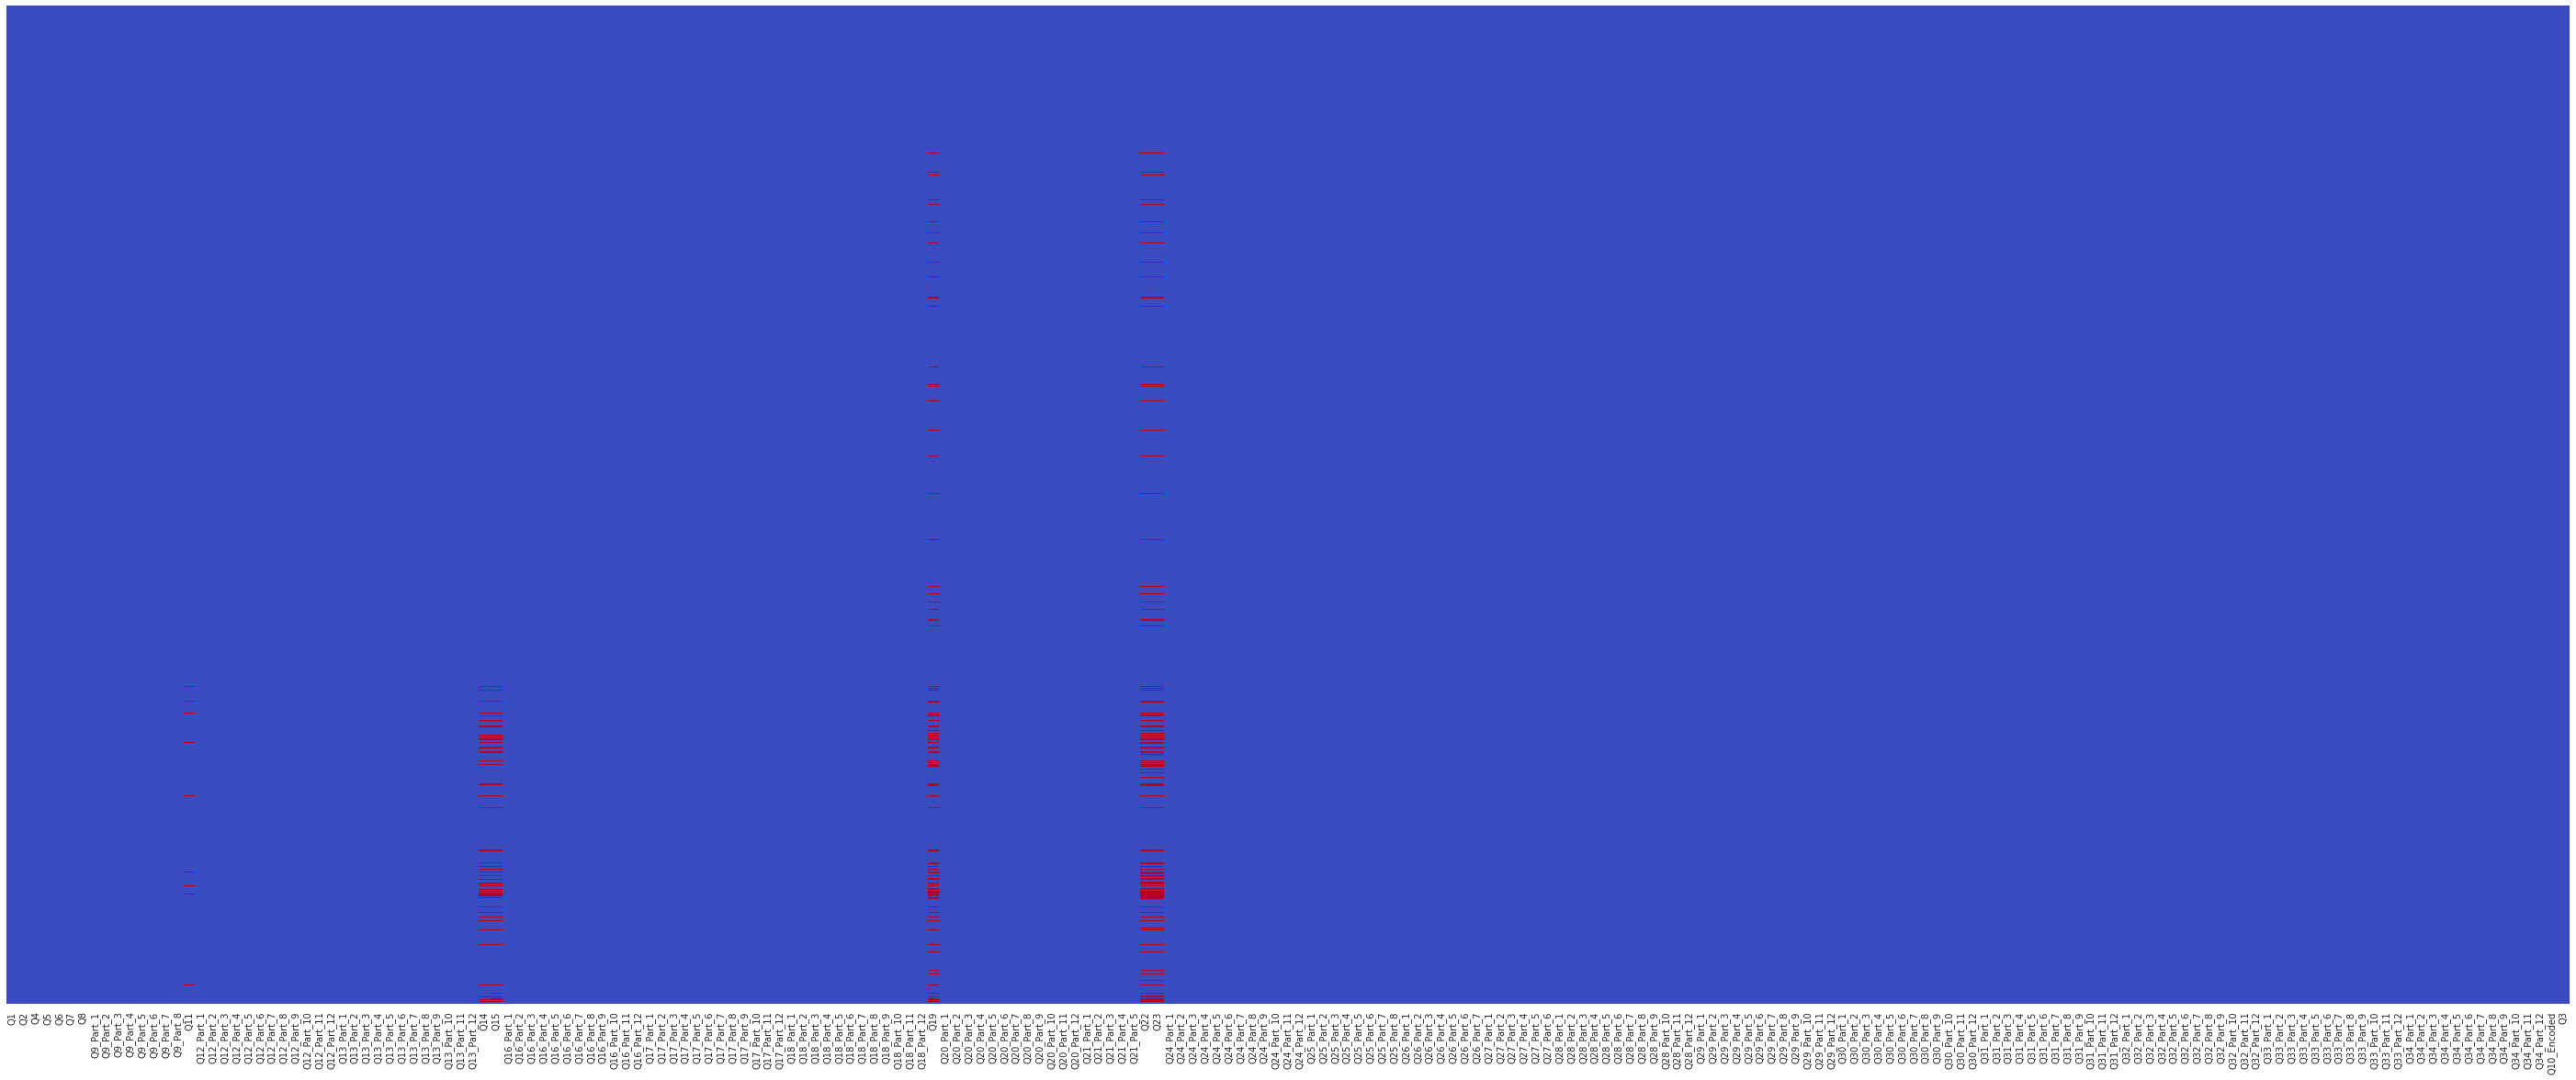

In [ ]:
# Check out new heatmap
fig, ax = plt.subplots(figsize=(50,20))
sns.heatmap(ndf.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

Allot of missing values have been removed!

In [ ]:
print('Q11 is',questions.loc['Q11'])
print('____________________')
print('Q14 is',questions.loc['Q14']) # same people that answered nan here answered nan for Q15
print('Q15 is',questions.loc['Q15'])
print('____________________')
print('Q19 is',questions.loc['Q19'])
print('____________________')
print('Q22 is',questions.loc['Q22'])# same people that answered nan here answered nan for Q23
print('Q23 is',questions.loc['Q23'])
print('____________________')

Q11 is 0    Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?
Name: Q11, dtype: object
____________________
Q14 is 0    What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice
Name: Q14, dtype: object
Q15 is 0    How long have you been writing code to analyze data (at work or at school)?
Name: Q15, dtype: object
____________________
Q19 is 0    What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice
Name: Q19, dtype: object
____________________
Q22 is 0    Have you ever used a TPU (tensor processing unit)?
Name: Q22, dtype: object
Q23 is 0    For how many years have you used machine learning methods?
Name: Q23, dtype: object
____________________


### looking at Q11

> Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?

> 247 null



In [ ]:
print('Q11 is', questions.loc['Q11'],'\n\n with',sum(ndf.Q11.isnull()),'null\n')
ndf.Q11.value_counts(normalize=True)

Q11 is 0    Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?
Name: Q11, dtype: object 

 with 91 null



$0 (USD)             0.324283
$100-$999            0.190950
$1000-$9,999         0.174462
$1-$99               0.122043
$10,000-$99,999      0.106093
> $100,000 ($USD)    0.082168
Name: Q11, dtype: float64

looking at the salaries of those who failed to input their amount spent 

(array([50.,  6.,  6.,  6.,  4.,  3.,  0.,  4.,  2.,  1.,  5.,  2.,  1.,
         1.]),
 array([ 0.        ,  0.85714286,  1.71428571,  2.57142857,  3.42857143,
         4.28571429,  5.14285714,  6.        ,  6.85714286,  7.71428571,
         8.57142857,  9.42857143, 10.28571429, 11.14285714, 12.        ]),
 <a list of 14 Patch objects>)

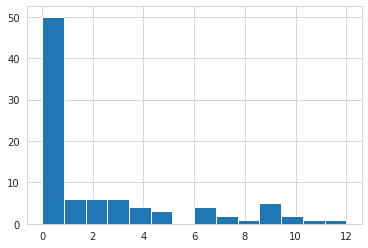

In [ ]:
plt.hist(x=ndf[ndf.Q11.isnull()].Q10_Encoded, bins=14)

we see that a majority are in the lowest salary bracket.

comparing average amount spent to salaries

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

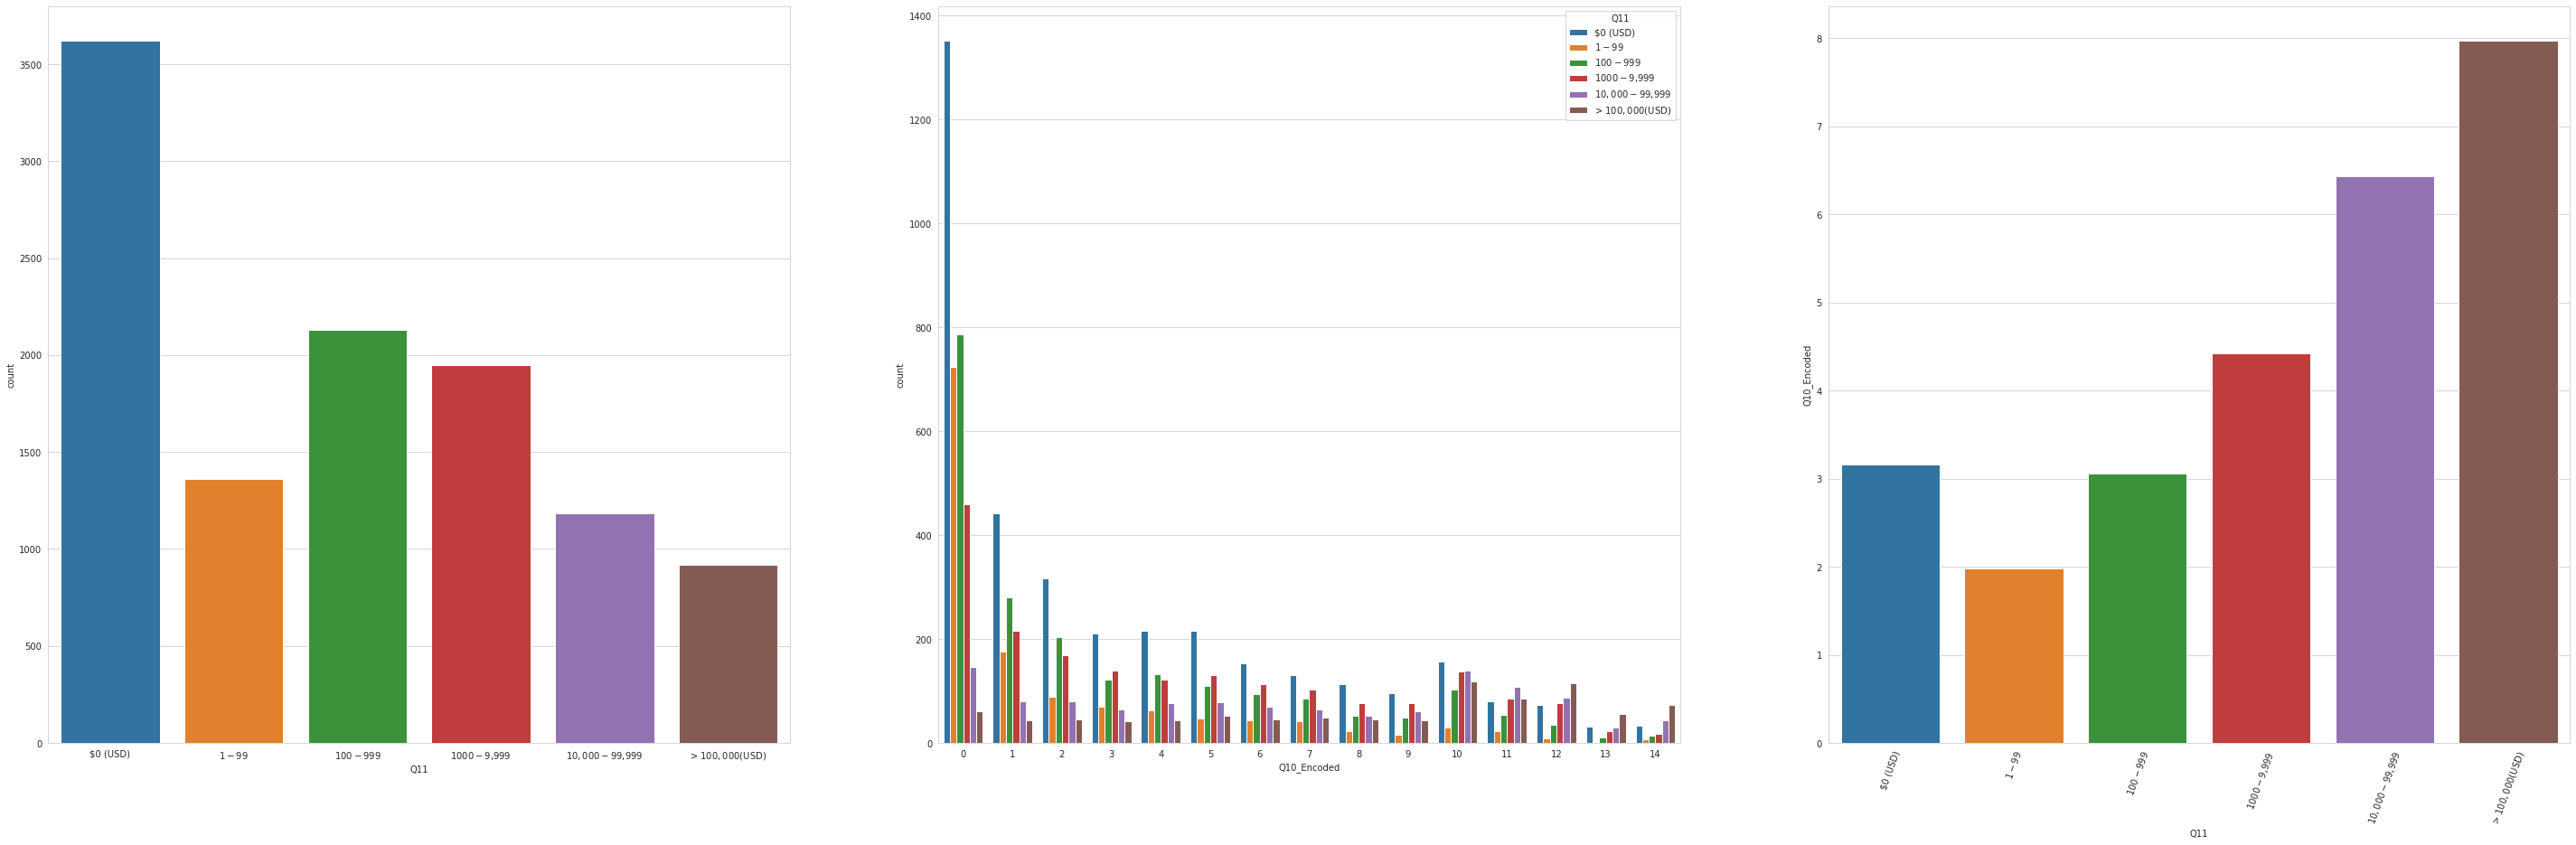

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(50,15))
# Plot the number of occurances for amount spent 
sns.countplot(x='Q11', data=ndf, ax=ax1, order=['$0 (USD)','$1-$99','$100-$999','$1000-$9,999','$10,000-$99,999','> $100,000 ($USD)'])
plt.xticks(rotation=70)
# salaries compared to amount spent on eductation
sns.countplot(x='Q10_Encoded', hue = 'Q11', data=ndf, ax=ax2, hue_order=['$0 (USD)','$1-$99','$100-$999','$1000-$9,999','$10,000-$99,999','> $100,000 ($USD)']) #order=[1,0])
plt.xticks(rotation=70)
# Group by amount spent on education, and get the mean for salary for each bracket
# mean salaries for each bracket
bbb = ndf[['Q11','Q10_Encoded']].groupby(['Q11'],as_index=False).mean()

# Plot the above mean
sns.barplot(x='Q11',y='Q10_Encoded', data=bbb, ax=ax3, order=['$0 (USD)','$1-$99','$100-$999','$1000-$9,999','$10,000-$99,999','> $100,000 ($USD)'])
plt.xticks(rotation=70)

clear corelation between amount spent and salary. since majority are in the lowest salary bracket and on average lowest salary earners spend (1-99)
on education we have decided to impute (1-99) for our Nan values 

In [ ]:
ndf['Q11']= ndf['Q11'].fillna('$1-$99')
print(ndf['Q11'].value_counts(normalize=True))
print('\nQ11 is', questions.loc['Q11'],'\n\n with',sum(ndf.Q11.isnull()),'null\n')

$0 (USD)             0.321660
$100-$999            0.189405
$1000-$9,999         0.173051
$1-$99               0.129144
$10,000-$99,999      0.105235
> $100,000 ($USD)    0.081504
Name: Q11, dtype: float64

Q11 is 0    Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?
Name: Q11, dtype: object 

 with 0 null



### looking at Q14

> What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice

> 1045 null

In [ ]:
print('Q14 is',questions.loc['Q14'],'\n\n with',sum(ndf.Q14.isnull()),'null\n') # same people that answered nan here answered nan for Q15
ndf.Q14.value_counts(normalize=True)

Q14 is 0    What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice
Name: Q14, dtype: object 

 with 532 null



Local development environments (RStudio, JupyterLab, etc.)              0.520944
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       0.179401
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                0.090680
Other                                                                   0.076033
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)    0.068570
Advanced statistical software (SPSS, SAS, etc.)                         0.064372
Name: Q14, dtype: float64

- no non bracket, could be at a managerial level?

(array([274.,  45.,  35.,  25.,  19.,  25.,  15.,  13.,   9.,  14.,  15.,
         10.,  15.,  18.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14.]),
 <a list of 14 Patch objects>)

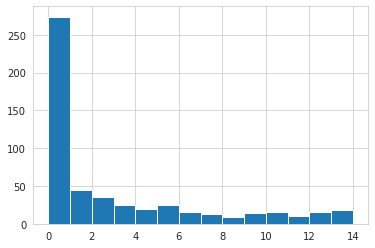

In [ ]:
plt.hist(x=ndf[ndf.Q14.isnull()].Q10_Encoded, bins=14)

Majority in lowest salary bracket. so unlikely managerial. 

looking at the dirstribution of answers for the participants that did not skip the question

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

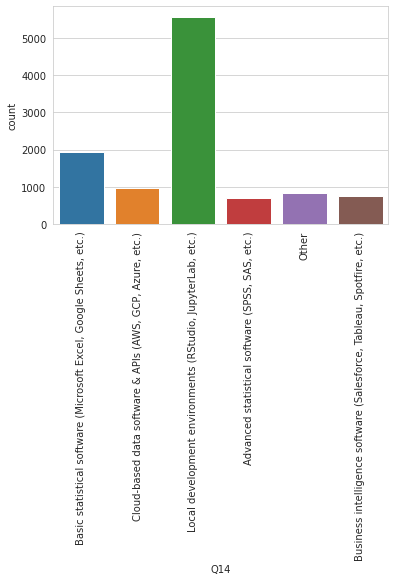

In [ ]:
sns.countplot(ndf.Q14)
plt.xticks(rotation='vertical')

majority selected "Local development environments (RStudio, JupyterLab, etc.)"

could impute using that as it is the mode

1045 is not too large for this to be worrisom and the mode is very dominant. 

but will investigate some more before deciding

comparing the results to salaries

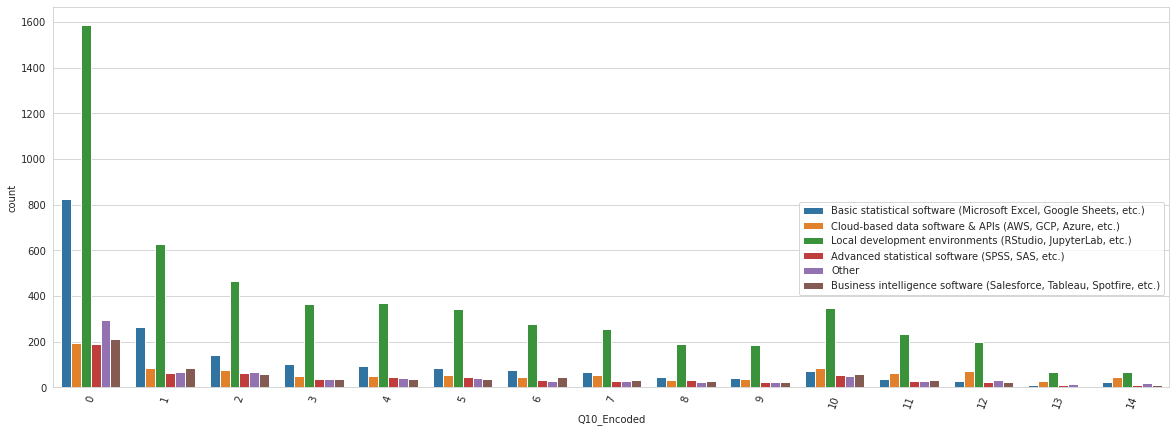

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x='Q10_Encoded', hue="Q14" ,data=ndf)
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1, 0.5))

majority of participants in the lower salary brackets also favoured "Local development environments (RStudio, JupyterLab, etc.)" giving me the confluence needed to impute empties with the mode

In [ ]:
# Fill NaN with most frequent categorical value as it is a reseasonable assumption for this question
unique_count = ndf.Q14.value_counts()
ndf.Q14= ndf.Q14.fillna(unique_count.index[0])
print(ndf.Q14.value_counts(normalize=True))
print('Q14 is',questions.loc['Q14'],'\n\n with',sum(ndf.Q14.isnull()),'null\n') # same people that answered nan here answered nan for Q15

Local development environments (RStudio, JupyterLab, etc.)              0.543596
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       0.170918
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                0.086392
Other                                                                   0.072438
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)    0.065328
Advanced statistical software (SPSS, SAS, etc.)                         0.061328
Name: Q14, dtype: float64
Q14 is 0    What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice
Name: Q14, dtype: object 

 with 0 null



### looking at Q15

> How long have you been writing code to analyze data (at work or at school)?

> 1075 null

Same people that failed to answer Q14 also failed to answer Q15

In [ ]:
print('Q15 is',questions.loc['Q15'],'\n\n with',sum(ndf.Q15.isnull()),'null\n')
ndf.Q15.value_counts(normalize=True)

Q15 is 0    How long have you been writing code to analyze data (at work or at school)?
Name: Q15, dtype: object 

 with 555 null



3-5 years                    0.249159
1-2 years                    0.237846
< 1 years                    0.180441
5-10 years                   0.154824
10-20 years                  0.089566
20+ years                    0.048149
I have never written code    0.040015
Name: Q15, dtype: float64

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 10 Text major ticklabel objects>)

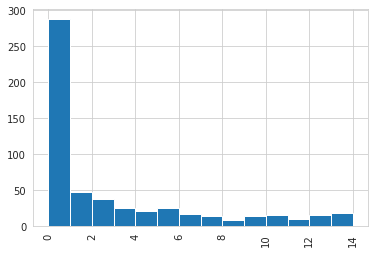

In [ ]:
plt.hist(x=ndf[ndf.Q15.isnull()].Q10_Encoded, bins=14)
plt.xticks(rotation='vertical')

majority of people who skipped this question are in the lowest salary bracket

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

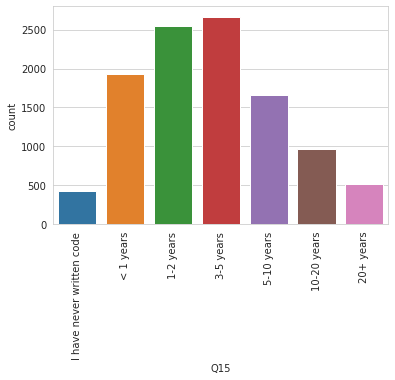

In [ ]:
sns.countplot(ndf.Q15, order=['I have never written code', '< 1 years','1-2 years','3-5 years', '5-10 years', '10-20 years','20+ years'])
plt.xticks(rotation='vertical')

fairly normally distributed. 

lets overlay this with the salary data for comparison

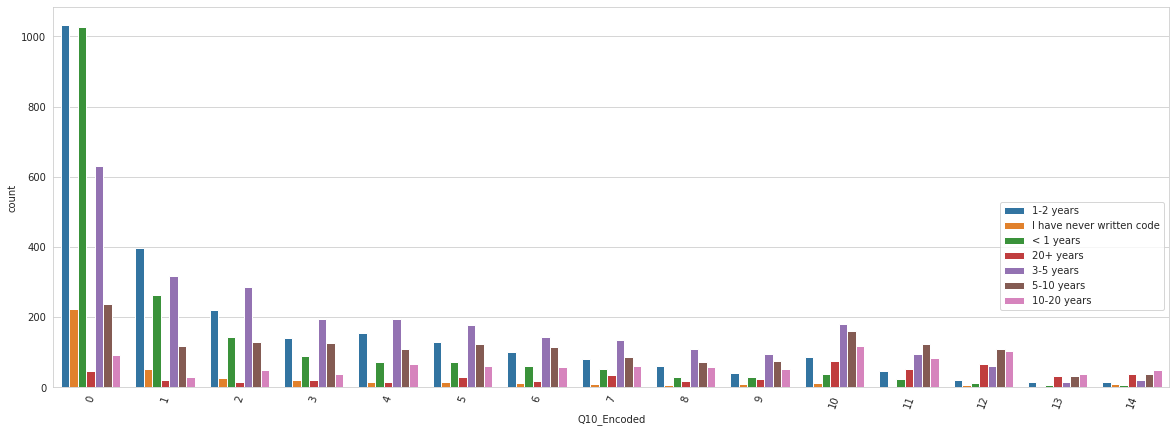

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x='Q10_Encoded', hue="Q15" ,data=ndf)
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1, 0.5))

this makes it difficult as both the < 1year and 1-2 years apear to be a tie for this salary bracket. need to find another way to impute this value

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

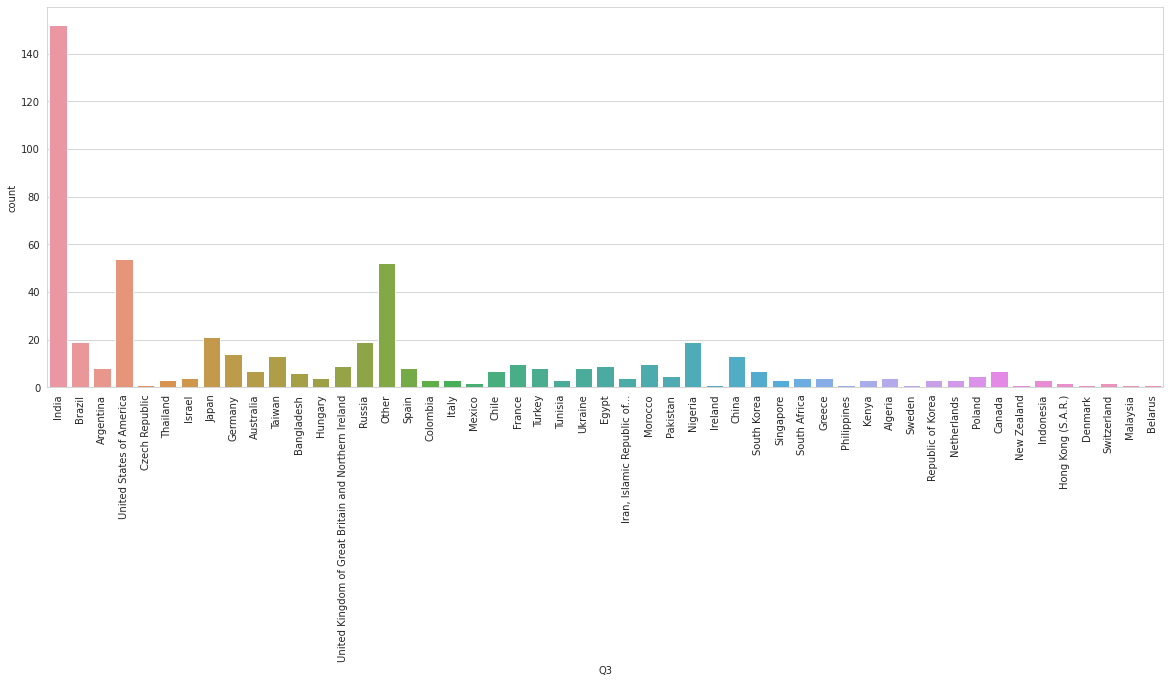

In [ ]:
'''plt.figure(figsize=(20,7))
plt.hist(x=ndf[ndf.Q15.isnull()].Q3)
plt.xticks(rotation='vertical')'''
plt.figure(figsize=(20,7))
sns.countplot(ndf[ndf.Q15.isnull()].Q3)
plt.xticks(rotation='vertical')

majority of these nans are coming from india, lets see what the average indian survey taker was writing

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

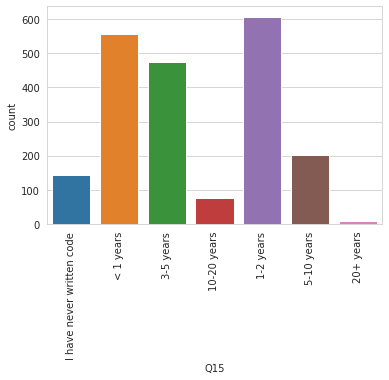

In [ ]:
sns.countplot(ndf[ndf.Q3=='India'].Q15)
plt.xticks(rotation='vertical')

same result

Will imput with mode from the india's answer distribution (1-2 years years experience)

In [ ]:
# Will imput with mode from the india's answer distribution (1-2 years years experience). less than 10% of column is Nan so I dont expect this to add bias
# Fill NaN with most frequent categorical value as it is a reseasonable assumption for this question but I will just drop the column instead!
# code to do fillnan commented bellow 

unique_count = ndf[ndf.Q3=='India'].Q15.value_counts()
ndf.Q15= ndf.Q15.fillna(unique_count.index[0])
print(ndf.Q15.value_counts(normalize=True))
print('Q15 is',questions.loc['Q15'],'\n\n with',sum(ndf.Q15.isnull()),'null\n') 


1-2 years                    0.275442
3-5 years                    0.236868
< 1 years                    0.171540
5-10 years                   0.147187
10-20 years                  0.085148
20+ years                    0.045774
I have never written code    0.038041
Name: Q15, dtype: float64
Q15 is 0    How long have you been writing code to analyze data (at work or at school)?
Name: Q15, dtype: object 

 with 0 null



### looking at Q19

> What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice

> 1844 null

In [ ]:
print('Q19 is',questions.loc['Q19'],'\n\n with',sum(ndf.Q19.isnull()),'null\n')
ndf.Q19.value_counts(normalize=True)

Q19 is 0    What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice
Name: Q19, dtype: object 

 with 1158 null



Python        0.769543
R             0.100168
SQL           0.069256
C++           0.012286
MATLAB        0.010800
Other         0.010601
C             0.008124
Java          0.006737
None          0.005647
Javascript    0.003270
Bash          0.003071
TypeScript    0.000495
Name: Q19, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

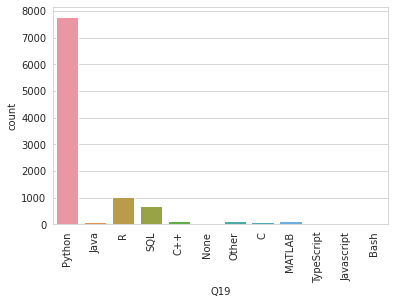

In [ ]:
sns.countplot(ndf.Q19)
plt.xticks(rotation='vertical')

Almost 1850 nan values out of 12498 values which is almost 15% making this a serious candidate for dropping. However almost 77% of participants answered python. 

Considering the level of confidence in python I could impute missing values with python. However, given the importance of not adding bias to our data I will need to run my results with and without this imputation. 

after running both ways I saw an improvemnt on accuracy with dropping this variable

In [ ]:
ndf.dropna(subset = ['Q19'],inplace=True)

In [ ]:
# unique_count = ndf.Q19.value_counts()
# ndf.Q19= ndf.Q19.fillna(unique_count.index[0])
# print(ndf.Q19.value_counts(normalize=True))
# print('Q19 is',questions.loc['Q19'],'\n\n with',sum(ndf.Q19.isnull()),'null\n') 

### looking at Q22

> Have you ever used a TPU (tensor processing unit)?

> 1947 null

In [ ]:
print('Q22 is',questions.loc['Q22'],'\n\n with',sum(ndf.Q22.isnull()),'null\n')# same people that answered nan here answered nan for Q23

ndf.Q22.value_counts(normalize=True)

Q22 is 0    Have you ever used a TPU (tensor processing unit)?
Name: Q22, dtype: object 

 with 89 null



Never         0.807277
Once          0.092463
2-5 times     0.075570
6-24 times    0.013495
> 25 times    0.011196
Name: Q22, dtype: float64

Almost 1950 nan values out of 12498 values which is over 15% making this a serious candidate for dropping. 

80% said never so could impute nans as never but dont want the extra bias.

for the same reasons as Q19 i will drop this one


In [ ]:
ndf.dropna(subset = ['Q23'],inplace=True)

In [ ]:
# unique_count = ndf.Q22.value_counts()
# ndf.Q22= ndf.Q22.fillna(unique_count.index[0])
# print(ndf.Q22.value_counts(normalize=True))
# print('Q22 is',questions.loc['Q22'],'\n\n with',sum(ndf.Q22.isnull()),'null\n') 

### looking at Q23

> For how many years have you used machine learning methods?

> 1956 null

In [ ]:
print('Q23 is',questions.loc['Q23'],'\n\n with',sum(ndf.Q23.isnull()),'null\n')
ndf.Q23.value_counts(normalize=True)

Q23 is 0    For how many years have you used machine learning methods?
Name: Q23, dtype: object 

 with 0 null



< 1 years      0.291058
1-2 years      0.257451
2-3 years      0.148930
3-4 years      0.092619
4-5 years      0.081516
5-10 years     0.079416
10-15 years    0.032006
20+ years      0.017003
Name: Q23, dtype: float64

around 1950 nan values out of 12498 values which is over 15% making this a serious candidate for dropping.

0 years experience could be because they are not data scientists. I will be dropping all these rows. to hopefully eliminate people who took the survey accidentaly

In [ ]:
ndf.dropna(subset = ['Q23'],inplace=True)

##Drop all null *values*

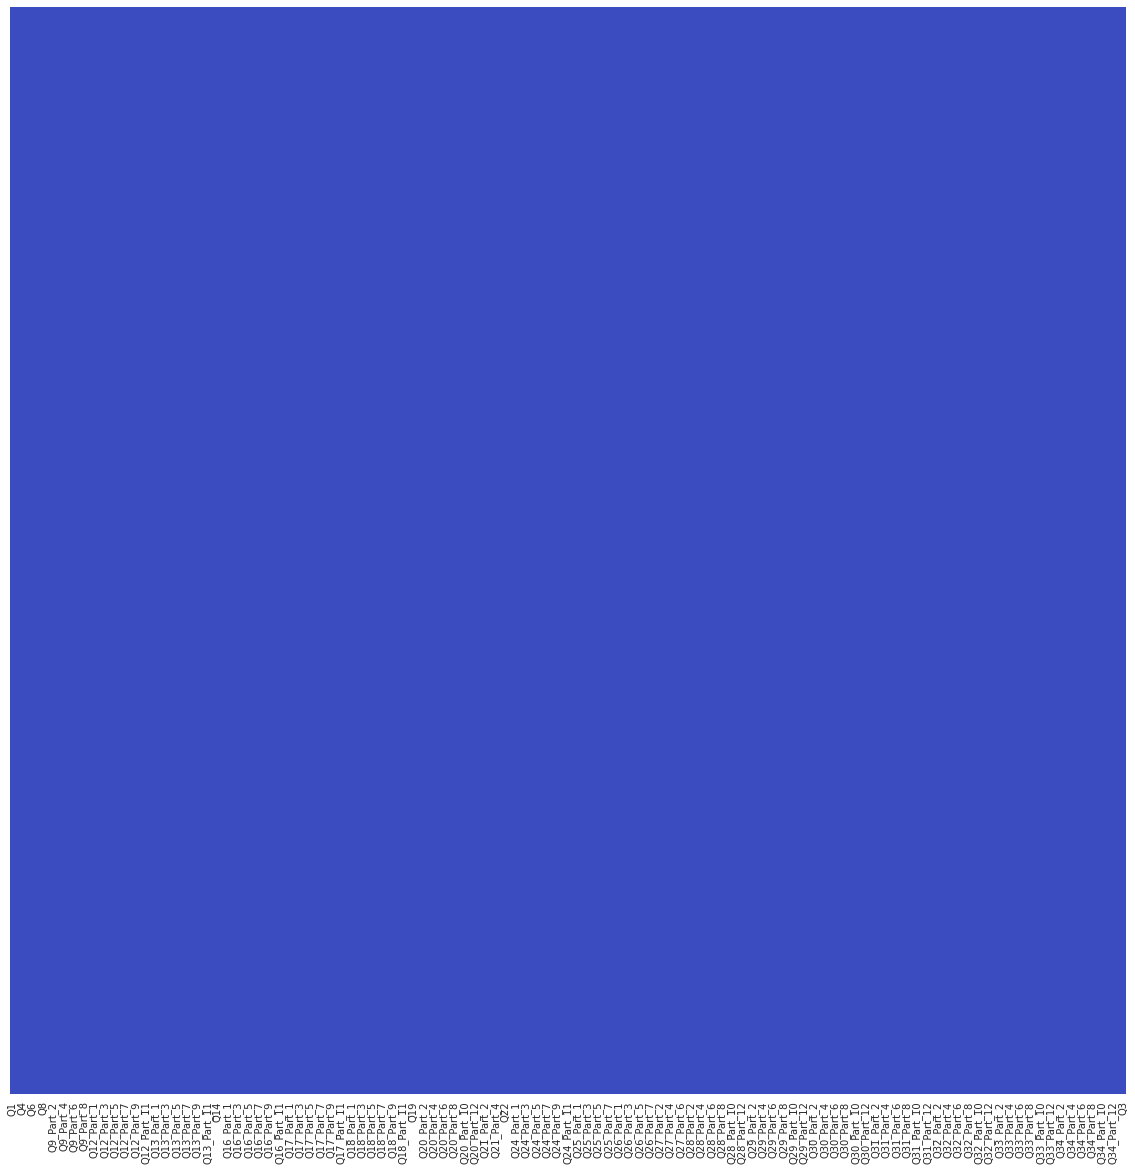

In [ ]:
# Check out new heatmap
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(ndf.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

In [ ]:
print("No. of columns containing null values")
print(len(ndf.columns[ndf.isna().any()]))
ndf.columns[ndf.isna().any()]

No. of columns containing null values
0


Index([], dtype='object')

## Encode

### Analyze

In [ ]:
#default is 60
pd.options.display.max_rows=500

In [ ]:
# look at the number of unique entries in every column
filt=ndf.describe(include='all').loc['unique',:]
filt

Q1              11
Q2               4
Q4               7
Q5              10
Q6               5
Q7               7
Q8               6
Q9_Part_1        2
Q9_Part_2        2
Q9_Part_3        2
Q9_Part_4        2
Q9_Part_5        2
Q9_Part_6        2
Q9_Part_7        2
Q9_Part_8        2
Q11              6
Q12_Part_1       2
Q12_Part_2       2
Q12_Part_3       2
Q12_Part_4       2
Q12_Part_5       2
Q12_Part_6       2
Q12_Part_7       2
Q12_Part_8       2
Q12_Part_9       2
Q12_Part_10      2
Q12_Part_11      2
Q12_Part_12      2
Q13_Part_1       2
Q13_Part_2       2
Q13_Part_3       2
Q13_Part_4       2
Q13_Part_5       2
Q13_Part_6       2
Q13_Part_7       2
Q13_Part_8       2
Q13_Part_9       2
Q13_Part_10      2
Q13_Part_11      2
Q13_Part_12      2
Q14              6
Q15              6
Q16_Part_1       2
Q16_Part_2       2
Q16_Part_3       2
Q16_Part_4       2
Q16_Part_5       2
Q16_Part_6       2
Q16_Part_7       2
Q16_Part_8       2
Q16_Part_9       2
Q16_Part_10      2
Q16_Part_11 

find and filter out columns yet to be encoded. (ie. non multiple choice)

In [ ]:
# find and filter out columns yet to be encoded. (ie. non multiple choice)
non_encoded=filt[filt!=2]
encoded_multi=filt[filt==2]
non_encoded.drop(index='Q10_Encoded',inplace=True)
non_encoded

Q1     11
Q2      4
Q4      7
Q5     10
Q6      5
Q7      7
Q8      6
Q11     6
Q14     6
Q15     6
Q19    12
Q22     5
Q23     8
Q3     59
Name: unique, dtype: object

In [ ]:
pd.options.display.max_rows=60
non_encoded.index

Index(['Q1', 'Q2', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q11', 'Q14', 'Q15', 'Q19',
       'Q22', 'Q23', 'Q3'],
      dtype='object')

In [ ]:
ndf[non_encoded.index]

,Q1,Q2,Q4,Q5,Q6,Q7,Q8,Q11,Q14,Q15,Q19,Q22,Q23,Q3
1,22-24,Male,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,$0 (USD),"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",1-2 years,Python,Never,1-2 years,France
3,40-44,Male,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"$10,000-$99,999","Local development environments (RStudio, JupyterLab, etc.)",1-2 years,Python,Once,2-3 years,Australia
4,22-24,Male,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),$0 (USD),"Local development environments (RStudio, JupyterLab, etc.)",< 1 years,Python,Never,< 1 years,India
5,50-54,Male,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., models in production for more than 2 years)","$10,000-$99,999","Advanced statistical software (SPSS, SAS, etc.)",20+ years,Java,Never,10-15 years,France
6,22-24,Male,Master’s degree,Data Scientist,50-249 employees,20+,We are exploring ML methods (and may one day put a model into production),$100-$999,"Local development environments (RStudio, JupyterLab, etc.)",3-5 years,Python,6-24 times,2-3 years,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12465,22-24,Female,Bachelor’s degree,Other,50-249 employees,1-2,We are exploring ML methods (and may one day put a model into production),$100-$999,"Local development environments (RStudio, JupyterLab, etc.)",1-2 years,Python,Never,1-2 years,Other
12471,22-24,Male,Master’s degree,Statistician,"1000-9,999 employees",5-9,No (we do not use ML methods),$0 (USD),"Local development environments (RStudio, JupyterLab, etc.)",3-5 years,Python,Never,1-2 years,Sweden
12480,25-29,Male,I prefer not to answer,Data Engineer,250-999 employees,5-9,"We recently started using ML methods (i.e., models in production for less than 2 years)",$100-$999,"Local development environments (RStudio, JupyterLab, etc.)",1-2 years,Python,Once,1-2 years,China
12487,25-29,Male,Bachelor’s degree,Other,"1000-9,999 employees",5-9,No (we do not use ML methods),"$10,000-$99,999","Local development environments (RStudio, JupyterLab, etc.)",3-5 years,Python,Never,1-2 years,Australia


In [ ]:
questions.loc[ndf[non_encoded.index].columns]

,0
Q1,What is your age (# years)?
Q2,What is your gender? - Selected Choice
Q4,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Q5,Select the title most similar to your current role (or most recent title if retired): - Selected Choice
Q6,What is the size of the company where you are employed?
Q7,Approximately how many individuals are responsible for data science workloads at your place of business?
Q8,Does your current employer incorporate machine learning methods into their business?
Q11,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?
Q14,What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice
Q15,How long have you been writing code to analyze data (at work or at school)?


From the above it the following is clear

- ordinal:
> Q1, Q6, Q7,Q11,Q15, Q12, Q22, Q23
- coordinal
> Q2, Q4, Q5, Q8, Q14, Q3, Q19


### Ordinal

In [ ]:
ndf.Q1.unique()

array(['22-24', '40-44', '50-54', '55-59', '30-34', '18-21', '35-39',
       '25-29', '45-49', '60-69', '70+'], dtype=object)

In [ ]:
Q1_encode = {   '18-21': 0,
             
             '22-24': 1,
                 
                 '25-29': 2,
                 '30-34': 3,
                 '35-39': 4,
                 '40-44': 5,
                 '45-49': 6,
                 '50-54': 7, 
                 '55-59': 8,
                 '60-69': 9, 
                 '70+' : 10}

In [ ]:
ndf['Q1_Encoded'] = ndf['Q1'].map(Q1_encode).astype(int)
ndf.drop(columns='Q1', axis=1, inplace=True)
ndf.head(3)

,Q2,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q14,...,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded,Q3,Q1_Encoded
1,Male,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,0,0,0,0,0,0,0,0,$0 (USD),1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,France,1
3,Male,Master’s degree,Other,"> 10,000 employees",20+,I do not know,0,0,0,0,0,0,0,0,"$10,000-$99,999",0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,"Local development environments (RStudio, JupyterLab, etc.)",...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,14,Australia,5
4,Male,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),0,0,0,0,0,0,0,0,$0 (USD),0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,"Local development environments (RStudio, JupyterLab, etc.)",...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,India,1


In [ ]:
ndf.Q6.unique()

array(['1000-9,999 employees', '> 10,000 employees', '0-49 employees',
       '50-249 employees', '250-999 employees'], dtype=object)

In [ ]:
Q6_encode=  {    
                 '0-49 employees':0, 
                 '50-249 employees':1,
                 '250-999 employees':2,
             '1000-9,999 employees':3,
                 '> 10,000 employees':4
             }  


In [ ]:
ndf['Q6_Encoded'] = ndf['Q6'].map(Q6_encode).astype(int)
ndf.drop(columns='Q6', axis=1, inplace=True)
ndf.head(3)

,Q2,Q4,Q5,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q14,Q15,...,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded,Q3,Q1_Encoded,Q6_Encoded
1,Male,Master’s degree,Software Engineer,0,I do not know,0,0,0,0,0,0,0,0,$0 (USD),1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",1-2 years,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,France,1,3
3,Male,Master’s degree,Other,20+,I do not know,0,0,0,0,0,0,0,0,"$10,000-$99,999",0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,"Local development environments (RStudio, JupyterLab, etc.)",1-2 years,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,14,Australia,5,4
4,Male,Bachelor’s degree,Other,0,No (we do not use ML methods),0,0,0,0,0,0,0,0,$0 (USD),0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,"Local development environments (RStudio, JupyterLab, etc.)",< 1 years,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,India,1,0


In [ ]:
ndf.Q7.unique()
questions.loc['Q7']

0    Approximately how many individuals are responsible for data science workloads at your place of business?
Name: Q7, dtype: object

In [ ]:
Q7_encode=  {    '0':0,
                 '1-2':1,
             '3-4':2,    
             '5-9':3,
                 '10-14':4,
                 '15-19':5,
                 '20+':6
             }  

In [ ]:
ndf['Q7_Encoded'] = ndf['Q7'].map(Q7_encode).astype(int)
ndf.drop(columns='Q7', axis=1, inplace=True)
ndf.head(3)

,Q2,Q4,Q5,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q14,Q15,Q16_Part_1,...,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded,Q3,Q1_Encoded,Q6_Encoded,Q7_Encoded
1,Male,Master’s degree,Software Engineer,I do not know,0,0,0,0,0,0,0,0,$0 (USD),1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",1-2 years,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,France,1,3,0
3,Male,Master’s degree,Other,I do not know,0,0,0,0,0,0,0,0,"$10,000-$99,999",0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,"Local development environments (RStudio, JupyterLab, etc.)",1-2 years,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,14,Australia,5,4,6
4,Male,Bachelor’s degree,Other,No (we do not use ML methods),0,0,0,0,0,0,0,0,$0 (USD),0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,"Local development environments (RStudio, JupyterLab, etc.)",< 1 years,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,India,1,0,0


In [ ]:
ndf.Q11.unique()

array(['$0 (USD)', '$10,000-$99,999', '$100-$999', '$1000-$9,999',
       '> $100,000 ($USD)', '$1-$99'], dtype=object)

In [ ]:

Q11_encode=  {    
'$0 (USD)':0,
 '$1-$99':1,
'$100-$999':2,
'$1000-$9,999':3,
'$10,000-$99,999':4,
'> $100,000 ($USD)':5
             }  

In [ ]:
ndf['Q11_Encoded'] = ndf['Q11'].map(Q11_encode).astype(int)
ndf.drop(columns='Q11', axis=1, inplace=True)


In [ ]:
ndf.Q15.unique()

array(['1-2 years', '< 1 years', '20+ years', '3-5 years', '5-10 years',
       '10-20 years'], dtype=object)

In [ ]:
Q15_encode=  {  '< 1 years':0, 
'1-2 years':1,
'3-5 years':2,
 '5-10 years':3,
 '10-20 years':4,
 '20+ years':5}

In [ ]:
ndf['Q15_Encoded'] = ndf['Q15'].map(Q15_encode).astype(int)
ndf.drop(columns='Q15', axis=1, inplace=True)


In [ ]:
ndf.Q22.unique() 

array(['Never', 'Once', '6-24 times', '2-5 times', '> 25 times'],
      dtype=object)

In [ ]:
Q22_encode=  {'Never':0, 
'Once':1, 
'2-5 times':2,
'6-24 times':3, 
 '> 25 times':4}

In [ ]:
ndf['Q22_Encoded'] = ndf['Q22'].map(Q22_encode).astype(int)
ndf.drop(columns='Q22', axis=1, inplace=True)


In [ ]:
ndf.Q23.unique() 

array(['1-2 years', '2-3 years', '< 1 years', '10-15 years', '3-4 years',
       '4-5 years', '5-10 years', '20+ years'], dtype=object)

In [ ]:
Q23_encode=  {    
    0:0,
    '< 1 years':1,
    '1-2 years':2,
    '2-3 years':3,
    '3-4 years':4,
    '4-5 years':5, 
    '5-10 years':6, 
    '10-15 years':7,
    '20+ years':8

             }  

In [ ]:
ndf['Q23_Encoded'] = ndf['Q23'].map(Q23_encode).astype(int)
ndf.drop(columns='Q23', axis=1, inplace=True)


### Coordinal

will be using dummy incoding to help keep dimensionality under control while also limiting redundancy 

In [ ]:
col_name='Q2'
A=pd.get_dummies(ndf,columns=[col_name],prefix=col_name,drop_first=True)
ndf=pd.concat([ndf, A.iloc[:,-(len(ndf[col_name].unique())-1):]], axis=1)
ndf.drop(columns=col_name, axis=1, inplace=True)


In [ ]:
col_name='Q4'
A=pd.get_dummies(ndf,columns=[col_name],prefix=col_name,drop_first=True)
ndf=pd.concat([ndf,A.iloc[:,-(len(ndf[col_name].unique())-1):]], axis=1)
ndf.drop(columns=col_name, axis=1, inplace=True)


In [ ]:
col_name='Q5'
A=pd.get_dummies(ndf,columns=[col_name],prefix=col_name,drop_first=True)
ndf=pd.concat([ndf,A.iloc[:,-(len(ndf[col_name].unique())-1):]], axis=1)
ndf.drop(columns=col_name, axis=1, inplace=True)

In [ ]:
col_name='Q8'
A=pd.get_dummies(ndf,columns=[col_name],prefix=col_name,drop_first=True)
ndf=pd.concat([ndf,A.iloc[:,-(len(ndf[col_name].unique())-1):]], axis=1)
ndf.drop(columns=col_name, axis=1, inplace=True)


In [ ]:
col_name='Q14'
A=pd.get_dummies(ndf,columns=[col_name],prefix=col_name,drop_first=True)
ndf=pd.concat([ndf,A.iloc[:,-(len(ndf[col_name].unique())-1):]], axis=1)
ndf.drop(columns=col_name, axis=1, inplace=True)


In [ ]:
col_name='Q3'
A=pd.get_dummies(ndf,columns=[col_name],prefix=col_name,drop_first=True)
ndf=pd.concat([ndf, A.iloc[:,-(len(ndf[col_name].unique())-1):]], axis=1)
ndf.drop(columns=col_name, axis=1, inplace=True)

In [ ]:
col_name='Q19'
A=pd.get_dummies(ndf,columns=[col_name],prefix=col_name,drop_first=True)
ndf=pd.concat([ndf, A.iloc[:,-(len(ndf[col_name].unique())-1):]], axis=1)
ndf.drop(columns=col_name, axis=1, inplace=True)

In [ ]:
col_name='Q10_Encoded'
ndf['Q10_Encoded']=ndf['Q10_Encoded'].astype(int)
ndf.astype(float)
ndf.astype(int)
ndf.head()

,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,...,Q3_Morocco,Q3_Netherlands,Q3_New Zealand,Q3_Nigeria,Q3_Norway,Q3_Other,Q3_Pakistan,Q3_Peru,Q3_Philippines,Q3_Poland,Q3_Portugal,Q3_Republic of Korea,Q3_Romania,Q3_Russia,Q3_Saudi Arabia,Q3_Singapore,Q3_South Africa,Q3_South Korea,Q3_Spain,Q3_Sweden,Q3_Switzerland,Q3_Taiwan,Q3_Thailand,Q3_Tunisia,Q3_Turkey,Q3_Ukraine,Q3_United Kingdom of Great Britain and Northern Ireland,Q3_United States of America,Q3_Viet Nam,Q19_C,Q19_C++,Q19_Java,Q19_Javascript,Q19_MATLAB,Q19_None,Q19_Other,Q19_Python,Q19_R,Q19_SQL,Q19_TypeScript
1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,1,0,0,0,1,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
endf=ndf

# 2. Exploratory data analysis and feature selection: 

For the exploratory data analysis step, I visualize the order of feature importance.

In [ ]:
X = endf.drop(['Q10_Encoded'],axis=1)
y = endf['Q10_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [ ]:
X.shape

(9998, 306)

In [ ]:
y.shape

(9998,)

###Quick look at the correlation matrix. 

it is faily intense. 

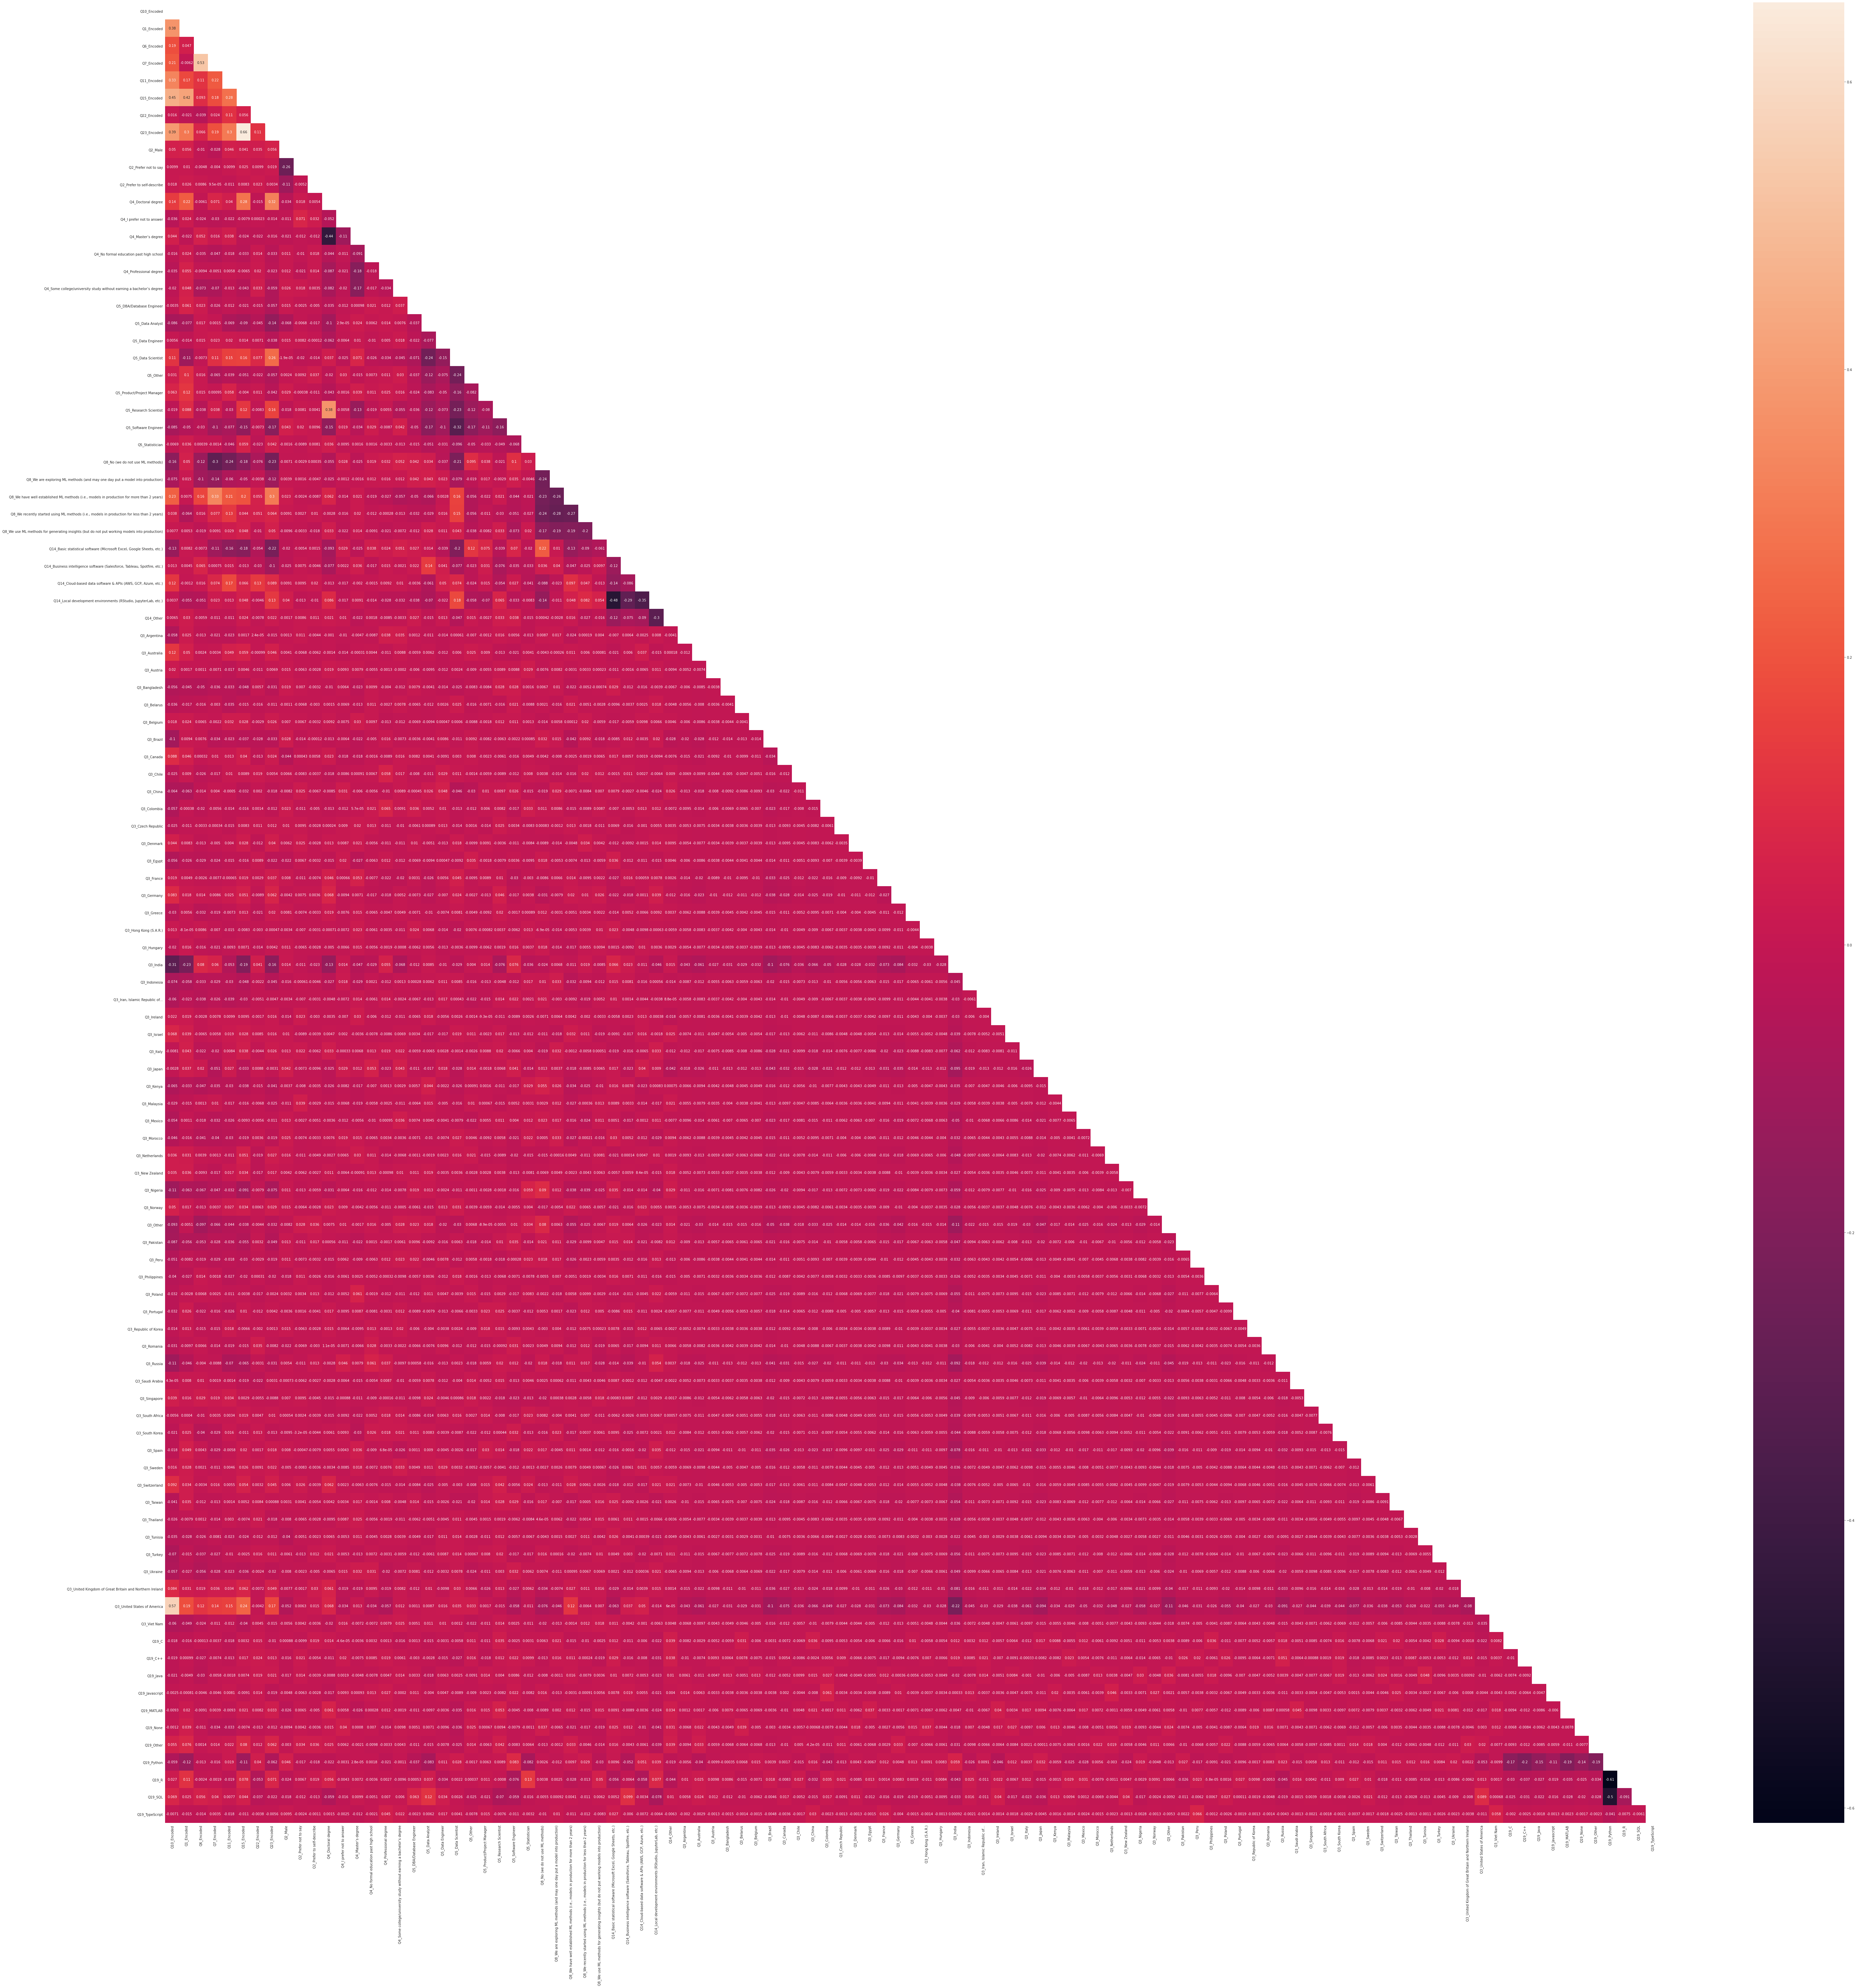

In [ ]:
fig, ax = plt.subplots(figsize=(100,100))
mask = np.zeros_like(endf.corr()*-1)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(endf.corr(), mask=mask, annot=True, ax=ax )

In [ ]:
questions.loc['Q23']

0    For how many years have you used machine learning methods?
Name: Q23, dtype: object

key take aways:

- too many features
- Q3_USA is highly correlated to salaries so is age(Q1) amount spent on education (Q11) suration writing code(Q15) number of years using ML (Q23)
- people with companies that have been working on established models for over 2 years is correlated to the number of individuals are responsible for data science workloads at a place of business.
- reaserch scientists corelate to doctoral degrees 
- doctoral degree corelate to number of years using machine learning 
- Q23= number of years using ml correltes most highly to Q15'How long have you been writing code to analyze data (at work or at school)?'
- Q15 also highly correlated to salaries
- Q23 also correlates to amount spent on education. 
- highest correlation had a coeefiicient of 0.6.
- not enough motivation to eleminate features soley due to correlation
- Q6 and Q7 are highly correlated. number of employees vs size of company. could drop one of these for redundancy 

- feature reduction can be used to adress such multi-colinearity 



### Tree-Based Classification of feature importance

In addition to the correlation plot, I decided to plot a tree-based model to evaluate feature importance just for curiosity and to get some confluence to the Lasso reg I am about to do. 

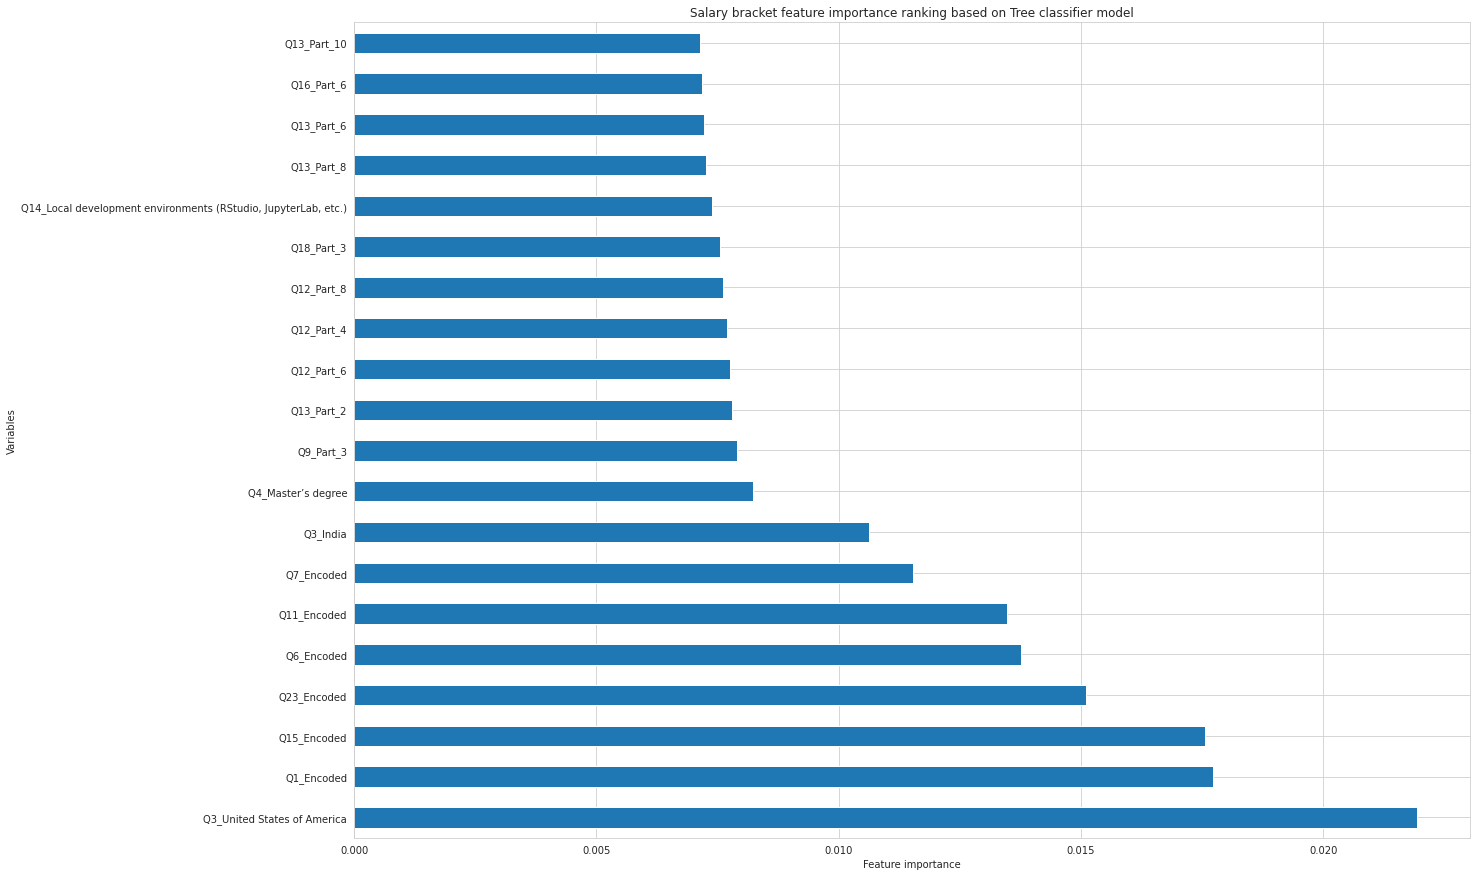

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
ax= feat_importances.nlargest(20).plot(kind='barh', figsize=(20, 15))           #Change from 50 to see more!!
ax.set_xlabel('Feature importance')
ax.set_ylabel('Variables')
ax.set_title('Salary bracket feature importance ranking based on Tree classifier model')
plt.show()

Similarly to the correlation plot, - Q3_USA, age(Q1), amount spent on education (Q11), duration writing code(Q15) and number of years using ML (Q23) are ranked the 5 most importance features affecting the salary bracket of respondants! Additionally, it is interesting to note that the dummy variable for being in India is the 8th most important feature in this model. This confirms the distrubution discussed in section 1

###Lasso for feature selection 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, auc, mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
from sklearn.metrics import make_scorer, r2_score, confusion_matrix

reg_gridsearch = linear_model.Lasso(random_state=42)
#Parameters to test
parameters = {'alpha':[0.01,0.02,0.03, 0.005,0.1,0.2,0.4,0.5,1,3,0.04], # Constant that multiplies the L1 term. Defaults to 1.0.
             'normalize':[True,False]} #

# Compare parameters by score of model (I used R2 here at it is the most reasonable score to use for such L1 feature reduction)
acc_scorer_lm = make_scorer(r2_score)

# Run the grid search
grid_obj_lm = GridSearchCV(reg_gridsearch, parameters, scoring=acc_scorer_lm, cv=10)
grid_obj_lm = grid_obj_lm.fit(X_train, y_train)

reg_gridsearch = grid_obj_lm.best_estimator_  #Select best parameter combination

In [ ]:
# print out the optimal params so grid search does not need to be rerun
print('alpha (Constant that multiplies the L1 term):',grid_obj_lm.best_estimator_.alpha) 
print('normalize:',grid_obj_lm.best_estimator_.normalize)

alpha (Constant that multiplies the L1 term): 0.005
normalize: False


In [ ]:
reg_gridsearch.fit(X_train, y_train)
reg_gridsearch.score(X_train, y_train)

0.6301719314030103

In [ ]:
feature_coefs = sorted(list(zip(reg_gridsearch.coef_, X_test)),reverse=True)
#Can see that regularized coefficeints are more reasonable 

In [ ]:
feature_coefs

[(5.02532332062894, 'Q3_United States of America'),
 (4.387949920554408, 'Q3_Switzerland'),
 (3.7739542267736206, 'Q3_Australia'),
 (2.567923507160196, 'Q3_Canada'),
 (2.493420944814161, 'Q3_Israel'),
 (2.379636231457277,
  'Q3_United Kingdom of Great Britain and Northern Ireland'),
 (2.3450026744602606, 'Q3_Germany'),
 (2.166524617084894, 'Q3_Denmark'),
 (1.8657277076634953, 'Q3_Singapore'),
 (1.3265248706184853, 'Q3_New Zealand'),
 (1.2747146363025235, 'Q3_Netherlands'),
 (1.2688320028977984, 'Q3_France'),
 (1.2248188740614718, 'Q3_Hong Kong (S.A.R.)'),
 (1.061927963385302, 'Q3_Norway'),
 (0.7325410077442575, 'Q3_Ireland'),
 (0.6061325086326661, 'Q17_Part_6'),
 (0.5594497586944752, 'Q5_Product/Project Manager'),
 (0.5425773474940411, 'Q2_Male'),
 (0.5252699022287832,
  'Q8_We have well established ML methods (i.e., models in production for more than 2 years)'),
 (0.512749624817836, 'Q3_Japan'),
 (0.39629562829409176, 'Q3_Austria'),
 (0.36950544080312586, 'Q11_Encoded'),
 (0.322005137

Many 0 coeff features!

### Comparing 0 coeff features to least important features from the tree-based classifier


In [ ]:
removed_feats = X_train.columns[(reg_gridsearch.coef_ == 0).ravel().tolist()]
print(removed_feats)

Index(['Q9_Part_8', 'Q12_Part_5', 'Q12_Part_7', 'Q12_Part_10', 'Q12_Part_12',
       'Q13_Part_5', 'Q16_Part_4', 'Q16_Part_11', 'Q16_Part_12', 'Q17_Part_3',
       ...
       'Q3_Thailand', 'Q3_Tunisia', 'Q19_C', 'Q19_C++', 'Q19_Javascript',
       'Q19_MATLAB', 'Q19_None', 'Q19_Other', 'Q19_R', 'Q19_TypeScript'],
      dtype='object', length=135)


In [ ]:
feat_importances.nsmallest(135)

Q19_TypeScript                0.000041
Q3_Tunisia                    0.000062
Q33_Part_9                    0.000080
Q2_Prefer to self-describe    0.000109
Q26_Part_7                    0.000133
                                ...   
Q30_Part_6                    0.001890
Q3_Italy                      0.001903
Q3_Nigeria                    0.001953
Q5_Data Engineer              0.001963
Q9_Part_7                     0.001991
Length: 135, dtype: float64

In [ ]:
feat_importances.nsmallest(135).index

Index(['Q19_TypeScript', 'Q3_Tunisia', 'Q33_Part_9',
       'Q2_Prefer to self-describe', 'Q26_Part_7', 'Q3_Philippines',
       'Q19_Javascript', 'Q3_Egypt', 'Q3_Peru', 'Q3_Bangladesh',
       ...
       'Q17_Part_8', 'Q30_Part_8', 'Q30_Part_5', 'Q33_Part_7', 'Q20_Part_12',
       'Q30_Part_6', 'Q3_Italy', 'Q3_Nigeria', 'Q5_Data Engineer',
       'Q9_Part_7'],
      dtype='object', length=135)

In [ ]:
sum(el in feat_importances.nsmallest(135).index for el in removed_feats)

84

about 60 % of the 135 cols that the tree based classifier ranked as least important were also sent to zero by Lasso. further confluence.

**Our tree based feature importance classifier's results are inline with the outcome of our lasso reg!**

In [ ]:
#NEW X dataframe with removed features to be used in the following steps!
X_new = X.drop(removed_feats, axis=1)

In [ ]:
X_new=X_new.astype(str).astype(int)
y=y.astype(str).astype(int)

Regularization is a way of finding a good bias-variance tradeoff by tuning the complexity of the model. It is a very useful method to handle collinearity (high correlation among features), filter out noise from data, and eventually prevent overfitting.

LASSO regularization can intrinsically perform feature selection as the coefficients of the original predictors are shrunk towards zero. It still requires hyperparameter tuning because there's a regularization coefficient that weights how severe is the regularization of the loss function. In other words, regularization is a way of tuning or selecting the preferred level of model complexity so that our model performs better at predicting. Unlike L2 regularization, L1 regularization yields sparse feature vectors since most feature weights will be zero. The sparsity, in practice, can be very useful when we have a high-dimension dataset like this one that has many irrelevant features. Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. In the case of highly correlated features, Lasso arbitrarily selects any one feature among the highly correlated ones and reduced the coefficients of the rest to zero. Also, the chosen variable changes randomly with change in model parameters


# 3. Model implementation: 

I will begin by Implementing a logistic regression model on the training data.

In [ ]:
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn import metrics

# create new split for cross val 
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

Before Standardization

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

model = LogisticRegression(multi_class='ovr',random_state=0,solver='lbfgs')

acc_model=cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy') 

print('Ordered logistic regression: ', acc_model)
print('Kfold mean: ', np.mean(acc_model))
print('Kfold variance: ', np.var(acc_model))

Ordered logistic regression:  [0.33875    0.3475     0.3475     0.32       0.34375    0.33875
 0.33875    0.33875    0.34042553 0.33291615]
Kfold mean:  0.3387091677096371
Kfold variance:  5.665120964820692e-05


After Standardization

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# scale the data (Standardize to avoid scale induced bias in the algorithim)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

model = LogisticRegression(multi_class='ovr',random_state=0,solver='lbfgs')

acc_model=cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy') 

print('Ordered logistic regression: ', acc_model)
print('Kfold mean: ', np.mean(acc_model))
print('Kfold variance: ', np.var(acc_model))

Ordered logistic regression:  [0.34       0.34375    0.345      0.31375    0.33875    0.3475
 0.335      0.33875    0.35043805 0.32790989]
Kfold mean:  0.3380847934918648
Kfold variance:  0.00010309435008325482


Expected mean accuracy to jump but we witnessed a small decrease instead. strange. 

in both cases model accuracy seems consistently bad with very low variance. 



In [ ]:
model.fit(X_train,y_train)
probabilities = model.predict_proba(X_test)
print('The probabilities of the model of predicting the various the salary buckets for each observations in the test set is presented in the following dataframe:         ',
      probabilities)

The probabilities of the model of predicting the various the salary buckets for each observations in the test set is presented in the following dataframe:          [[1.30649896e-01 1.04470520e-01 8.58890044e-02 ... 1.36848720e-03
  3.63957203e-04 2.20615510e-04]
 [1.36503539e-02 6.52845343e-02 6.41807773e-02 ... 2.45324549e-03
  1.99881945e-04 5.65185709e-03]
 [2.55937547e-01 2.15391752e-02 1.94091314e-02 ... 1.07969534e-02
  1.81008265e-04 7.36862490e-04]
 ...
 [5.82462202e-03 2.48566256e-03 2.80024669e-03 ... 1.05511267e-01
  2.96715593e-01 1.60606437e-01]
 [2.70928468e-03 2.45420681e-03 5.50458622e-03 ... 1.37088770e-01
  2.31068184e-01 3.29624786e-01]
 [3.18845133e-01 2.47059011e-02 4.73991283e-02 ... 6.14227688e-03
  8.33186821e-06 8.36296372e-04]]


### Learning curve

Uses in turn the function sklearn.learning_curve.learning_curve(), which determines cross-validated training and test scores for different training set sizes. An (optional) cross-validation generator splits the given dataset k times in training and test data. (The default is 3-fold cross validation.) Subsets of the training set with varying sizes will be used to train the estimator and a score for each training subset size and the test set will be computed. The scores are averaged over all k runs for each training subset size.

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

Learning curve for the untuned Logistic Regression Model



```
LogisticRegression(multi_class='ovr',random_state=0,solver='lbfgs')
```



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

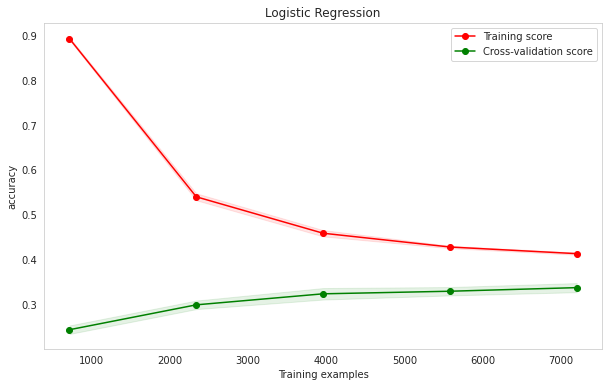

In [ ]:
plot_learning_curve(model,'Logistic Regression', X_train, y_train, cv=10)

First of all, we can see that the cross-validation score converges to the 0.33 accuracy value mentioned in the previous part. A model that is underfit will have low training and low testing accuracy while an overfit model will have extremely high training accuracy but a low testing accuracy.

In regards, to the shape of the curves presented above, the bigger the gap between the training accuracy and cross-validation accuracy curves, the higher the variance. The relatively small gap in the above curve shows that there is no high variance. This can be explained by the fact that a larger set of features fixes high variance/overfit. In fact, I tried plotting the same curves based on the original X features before the Lasso regularization from the previous step, and the gap was expectedly bigger between the two curves at convergence!

This model in fact has a relatively low training and low testing accuracy, which means that it is underfit! So the model has a high bias and getting more more training data will not (by itself) help much. I believe one option would be to go back and decrease 𝝀 (i.e., loosing regularization) to allow for more features in the feature selection part. But again, since it is a bias/variance tradeoff, this might increase variance too much!

The current logistic regression function is still not optimized. The hyperparameters variables of the logistic function can be optimized based on a the accuracy metric.

Alternativly, without using libraries the code would have been as follows:

In [ ]:
'''
from sklearn import metrics
# why do we not standardize y train or y test.. ONLY STANDARDIZE INDEPENDANT VARIABLES

model = LogisticRegression()    
model.fit(X_train, y_train)

predictions = model.predict(X_test) 
#TN = confusion_matrix(y_test, predictions)[0][0]
#FP = confusion_matrix(y_test, predictions)[0][1]
#FN = confusion_matrix(y_test, predictions)[1][0]
#TP = confusion_matrix(y_test, predictions)[1][1]
#total = TN + FP + FN + TP
#ACC = (TP + TN) / float(total)

ACC=metrics.accuracy_score(y_test, predictions)

print ("This model got an accuracy of {}% on the testing set".format(round(ACC*100,2)))  
'''

'\nfrom sklearn import metrics\n# why do we not standardize y train or y test.. ONLY STANDARDIZE INDEPENDANT VARIABLES\n\nmodel = LogisticRegression()    \nmodel.fit(X_train, y_train)\n\npredictions = model.predict(X_test) \n#TN = confusion_matrix(y_test, predictions)[0][0]\n#FP = confusion_matrix(y_test, predictions)[0][1]\n#FN = confusion_matrix(y_test, predictions)[1][0]\n#TP = confusion_matrix(y_test, predictions)[1][1]\n#total = TN + FP + FN + TP\n#ACC = (TP + TN) / float(total)\n\nACC=metrics.accuracy_score(y_test, predictions)\n\nprint ("This model got an accuracy of {}% on the testing set".format(round(ACC*100,2)))  \n'

In [ ]:
'''
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)      # number of folds
kfold.get_n_splits(X)
# recall X = endf.drop(['Q10_Encoded'],axis=1)    # WHY NOT THE TRAINING SET
accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    #TN = confusion_matrix(y_test, predictions)[0][0]
    #FP = confusion_matrix(y_test, predictions)[0][1]
    #FN = confusion_matrix(y_test, predictions)[1][0]
    #TP = confusion_matrix(y_test, predictions)[1][1]
    #total = TN + FP + FN + TP
    #ACC = (TP + TN) / float(total)
    
    # non binary multi class problem. using confusion matrix does not make sense to me

    ACC=metrics.accuracy_score(y_test, predictions)

    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))
'''

'\nmodel = LogisticRegression()\nscaler = StandardScaler()\nkfold = KFold(n_splits=10)      # number of folds\nkfold.get_n_splits(X)\n# recall X = endf.drop([\'Q10_Encoded\'],axis=1)    # WHY NOT THE TRAINING SET\naccuracy = np.zeros(10)\nnp_idx = 0\n\nfor train_idx, test_idx in kfold.split(X):\n    X_train, X_test = X.values[train_idx], X.values[test_idx]\n    y_train, y_test = y.values[train_idx], y.values[test_idx]\n    \n    X_train = scaler.fit_transform(X_train)\n    X_test = scaler.transform(X_test)\n    \n    model.fit(X_train, y_train)\n    \n    predictions = model.predict(X_test)\n    \n    #TN = confusion_matrix(y_test, predictions)[0][0]\n    #FP = confusion_matrix(y_test, predictions)[0][1]\n    #FN = confusion_matrix(y_test, predictions)[1][0]\n    #TP = confusion_matrix(y_test, predictions)[1][1]\n    #total = TN + FP + FN + TP\n    #ACC = (TP + TN) / float(total)\n    \n    # non binary multi class problem. using confusion matrix does not make sense to me\n\n    ACC=me

#4. Model tuning: 

Grid searching is a well known method for selecting hyperparameters that optimize your model. Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes

Grid search just builds several models with all the parameter combinations specified, and runs cross validation to return the set of parameters that had the highest cv score on the validation set. Sklearn has a GridSearchCV function that does all this.

To evaluate the potential improvement of the previous model, I used the accuracy metric to optimize the hyperparameters. Furthermore, I believe the proportion of positives is a good metric to predict salary brackets. That is, when a predicted rating is exactly right, it’s counted as a success. Everything else is counted as a prediction failure. Accuracy is equivalent to the propotion of successes.

In [ ]:
reg_gridsearch = LogisticRegression(multi_class='ovr',random_state=0)
#Parameters to test
#parameters = {'C':[0.001,0.01,0.03,0.05,0.1,0.5,1,5,10, 100],
#             'solver':['newton-cg','lbfgs','liblinear']} 

parameters = {'C':[0.001,0.01,0.03,0.05,0.1,0.5,1],
             'solver':['newton-cg','lbfgs','liblinear'], 
              'penalty':['l1', 'l2', 'none']} 

# Run the grid search 
grid_obj_lm = GridSearchCV(reg_gridsearch, parameters, cv=10, scoring='accuracy')      # COMMENT OUT TO SAVE YOUR TIME!! PLEASE UNCOMMENT IF YOU WANT TO RUN
grid_obj_lm = grid_obj_lm.fit(X_train, y_train)

reg_gridsearch = grid_obj_lm.best_estimator_  #Select best parameter combination:""

#print out the optimal params so grid search does not need to be rerun
print('C:',grid_obj_lm.best_estimator_.C) 
print('solver:',grid_obj_lm.best_estimator_.solver)
print('penalty:',grid_obj_lm.best_estimator_.penalty)

C: 0.01
solver: liblinear
penalty: l2


again accuracy was chosen as the gridsearch scoring parameter. other metrics could have been used to optimize the model in place of the accuracy metric. However, accuracy is the most appropriate for this application given that I am interested in checking the overall positives captured by the model.

The best model parameter coefficents are extracted from this step to be tested on the test data in the next section.

#5. Testing & Discussion: 
Using ymyour optimal model, I will to make classifications on the test set. 

In [ ]:
from sklearn.metrics import mean_absolute_error, f1_score,precision_score,recall_score, roc_auc_score

# Add optimal hyperparameters directly to avoid marker having to run the model
#reg_gridsearch = LogisticRegression(multi_class='ovr',random_state=42, C=0.05, solver='liblinear', penalty='l1')

In [ ]:
# Fit logistic regression model based on optimized hyperparameters
reg_gridsearch.fit(X_train, y_train)
# Evaluate predictions based on the test set
predictions = reg_gridsearch.predict(X_test)

print ("Logistic regression Train Accuracy : ", accuracy_score(y_train, reg_gridsearch.predict(X_train)))
print ("Logistic regression Test Accuracy : ", accuracy_score(y_test, reg_gridsearch.predict(X_test)))
# Accuracy of the test set for optimized model > accuracy of non-optimized model from part 4 so good!

Logistic regression Train Accuracy :  0.2807570977917981
Logistic regression Test Accuracy :  0.19852941176470587


To verify the evolution of the the optimal model compared to the previous non-optimized model, we can again look at our new learning curve.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

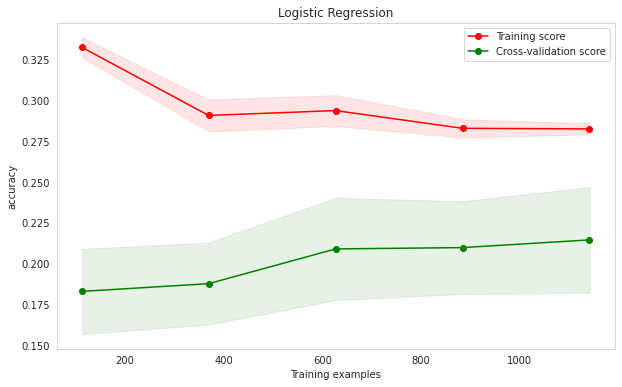

In [ ]:
plot_learning_curve(reg_gridsearch,'Logistic Regression', X_train, y_train, cv=10)

As a reminder, a model that is underfit will have low training and low testing accuracy while an overfit model will have high training accuracy but a low testing accuracy.

Hyper param tuning did not improve model performance, instead it worstend it and increased variance as the gap between the two curves slighlty increased compared to the non-optimized model. 

Ee can still say overall that the model is  underfit as the training and testing accuracy are not very high. 

The dataset is evidently plagued with noise and increasing dimensionality will put us at risk of fitting to this noise and learning spurious relationships.

decreasing dimensionality could also lead to us loosing valuable information and the ability to fit the complex relationships in the data.

Splitting the data based on demography and doing the analysis on a per demographic basis would help aleveiate this.

# Looking into more advanced models

In [ ]:
X_new=X_new.astype(str).astype(int)
y=y.astype(str).astype(int)

In [ ]:
# create new split for cross val 
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

In [ ]:
# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import math
from sklearn import svm 
import progressbar


#scale the data (Standardize to avoid scale induced bias in the algorithim)

def Standardize(X_train, X_test):
  X_scaler = StandardScaler().fit(X_train)
  
  X_train_std = pd.DataFrame(X_scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
  X_test_std = pd.DataFrame(X_scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

  return (X_train_std, X_test_std)


def model_selector(X_train,X_test,y_train,y_test):

  bar = progressbar.ProgressBar(maxval=7, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
  bar.start()

  # prepare models
  models = []
  models.append(('LogisticRegression', LogisticRegression()))
  models.append(('RandomForest', RandomForestClassifier()))
  models.append(('DecTree', DecisionTreeClassifier(criterion="gini"))) # selected gini to speed up computation
  models.append(('SVM', svm.SVC(kernel='linear'))) # arbitrarily selected the SVC kernel='linear' option
  models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))       
  # rule of thumb: k equals the square root of the number of points in the training data set in kNN. 
  # math.ceil(math.sqrt(X_train.shape[0]))
  models.append(('XGBoost', XGBClassifier(objective='reg:logistic')))   # according to https://www.datacamp.com/community/tutorials/xgboost-in-python we should use 
                                                                         #'''reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.'''
  #models.append(('GausNaiveBayes',GaussianNB())) 
  #models.append(('MultiNaiveBayes',MultinomialNB())) # cannot take negative values

  Training_score_acc=[]
  Testing_score_acc=[]
  #Mean_cross_validation_accuracy=[]
  #precision=[]
  #recall=[]
  f1score=[]
  idx=[]
  i=0
  
  # loop through each model
  for name, model in models:
    idx.append(name)
    #Cross Validation                                                           The function takes long enought time without this.. so I decided to remove it
    #score=cross_val_score(model,X_train,y_train, cv=5, scoring='accuracy')     # appears this is also the default scorer
    #Mean_cross_validation_accuracy.append(np.mean(score))
    
    #Training 
    model.fit(X_train, y_train)
    Training_score_acc.append(model.score(X_train,y_train)) # returns accuracy
    
    #Testing
    predictions=model.predict(X_test)
    Testing_score_acc.append(model.score(X_test,y_test)) 
                                                                                #confmtrx=confusion_matrix(y_test,predictions)
                                                                                #precision.append(precision_score(y_test,predictions))
                                                                                #recall.append(recall_score(y_test,predictions))
    f1score.append(f1_score(y_test,predictions, average='weighted'))   # f1_score(y_true, y_pred)
    # update status bar
    bar.update(i+1)

  #print updated status bar
  bar.finish()
                                                                                #"Mean cross validation accuracy": Mean_cross_validation_accuracy,
  # Create a DataFrame of all the CV results
  results = pd.DataFrame({
  "Training accuracy": Training_score_acc,
  "Testing accuracy": Testing_score_acc,
  "F1 score": f1score
  }, index=idx).sort_values(by='Testing accuracy')
  
  results=round(results*100,2)

  return (results)

Unstandardized

In [ ]:
model_selector(X_train,X_test,y_train,y_test)

[========================================================================] 100%


,Training accuracy,Testing accuracy,F1 score
DecTree,100.00,24.45,24.01
KNN,46.22,28.00,22.06
LogisticRegression,40.62,31.15,25.35
SVM,44.45,32.25,24.12
RandomForest,100.00,32.60,22.09
XGBoost,43.76,33.20,24.04


Standardized

In [ ]:
model_selector(Standardize(X_train, X_test)[0],Standardize(X_train, X_test)[1],y_train,y_test)

[========================================================================] 100%


,Training accuracy,Testing accuracy,F1 score
DecTree,100.00,24.0,23.65
KNN,46.29,27.9,21.97
LogisticRegression,41.77,31.6,26.43
SVM,47.41,32.2,24.37
RandomForest,100.00,32.3,21.69
XGBoost,43.76,33.2,24.04


Even these more complex models are unable to bring our accuracy and weighted f1 score up to reasonable levels, we are simply achieving more underfitting and higher viariance models. 

# Looking at just USA

In [ ]:
X_new=X_new.astype(str).astype(int)
y=y.astype(str).astype(int)

In [ ]:
X_US=X_new[X_new["Q3_United States of America"]==1]
y_US=y[X_US.index]

In [ ]:
X_US.loc[:,'Q3_Argentina':'Q3_Viet Nam'].columns

Index(['Q3_Argentina', 'Q3_Australia', 'Q3_Austria', 'Q3_Belgium', 'Q3_Brazil',
       'Q3_Canada', 'Q3_Colombia', 'Q3_Denmark', 'Q3_France', 'Q3_Germany',
       'Q3_Hong Kong (S.A.R.)', 'Q3_India', 'Q3_Indonesia',
       'Q3_Iran, Islamic Republic of...', 'Q3_Ireland', 'Q3_Israel',
       'Q3_Italy', 'Q3_Japan', 'Q3_Kenya', 'Q3_Mexico', 'Q3_Netherlands',
       'Q3_New Zealand', 'Q3_Nigeria', 'Q3_Norway', 'Q3_Pakistan', 'Q3_Peru',
       'Q3_Russia', 'Q3_Singapore', 'Q3_Spain', 'Q3_Sweden', 'Q3_Switzerland',
       'Q3_Turkey', 'Q3_Ukraine',
       'Q3_United Kingdom of Great Britain and Northern Ireland',
       'Q3_United States of America', 'Q3_Viet Nam'],
      dtype='object')

In [ ]:
X_US.drop(columns=X_US.loc[:,'Q3_Argentina':'Q3_Viet Nam'].columns, inplace=True)

In [ ]:
X_US

,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_6,Q12_Part_8,Q12_Part_9,Q12_Part_11,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q17_Part_1,Q17_Part_2,Q17_Part_6,Q17_Part_7,Q17_Part_11,...,Q31_Part_11,Q32_Part_3,Q32_Part_4,Q32_Part_6,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_11,Q34_Part_1,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_11,Q1_Encoded,Q6_Encoded,Q7_Encoded,Q11_Encoded,Q15_Encoded,Q23_Encoded,Q2_Male,Q4_Master’s degree,Q4_Professional degree,Q4_Some college/university study without earning a bachelor’s degree,Q5_Data Analyst,Q5_Data Engineer,Q5_Data Scientist,Q5_Other,Q5_Product/Project Manager,Q5_Research Scientist,Q5_Statistician,"Q8_We have well established ML methods (i.e., models in production for more than 2 years)","Q8_We recently started using ML methods (i.e., models in production for less than 2 years)","Q14_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q14_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q14_Local development environments (RStudio, JupyterLab, etc.)",Q19_Java,Q19_Python,Q19_SQL
7,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,6,0,2,4,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
11,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,6,0,2,3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
12,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,7,1,1,5,4,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
17,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,4,0,3,3,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
28,1,1,1,1,1,1,0,1,1,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,...,0,0,1,1,1,0,0,0,1,0,1,0,1,1,0,3,4,6,5,3,4,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12312,1,1,1,0,0,0,0,1,1,1,1,0,1,0,0,1,0,1,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,2,3,3,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
12315,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,0,1,0,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,4,1,1,3,4,7,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
12316,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2,3,6,5,1,2,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
12322,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,2,3,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# create new split for cross val 
X_train, X_test, y_train, y_test = train_test_split(X_US, y_US, test_size=0.3, random_state=0)

In [ ]:
# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import math
from sklearn import svm 
import progressbar


#scale the data (Standardize to avoid scale induced bias in the algorithim)

def Standardize(X_train, X_test):
  X_scaler = StandardScaler().fit(X_train)
  
  X_train_std = pd.DataFrame(X_scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
  X_test_std = pd.DataFrame(X_scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

  return (X_train_std, X_test_std)


def model_selector(X_train,X_test,y_train,y_test):

  bar = progressbar.ProgressBar(maxval=7, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
  bar.start()

  # prepare models
  models = []
  models.append(('LogisticRegression', LogisticRegression(multi_class='ovr',random_state=0,solver='lbfgs', max_iter=500)))
  models.append(('RandomForest', RandomForestClassifier( )))
  models.append(('DecTree', DecisionTreeClassifier(criterion="gini"))) # selected gini to speed up computation
  models.append(('SVM', svm.SVC(kernel='linear', ))) # arbitrarily selected the SVC kernel='linear' option
  models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))       
  # rule of thumb: k equals the square root of the number of points in the training data set in kNN. 
  # math.ceil(math.sqrt(X_train.shape[0]))
  models.append(('XGBoost', XGBClassifier(objective='reg:logistic')))   # according to https://www.datacamp.com/community/tutorials/xgboost-in-python we should use 
                                                                         #'''reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.'''
  #models.append(('GausNaiveBayes',GaussianNB())) 
  #models.append(('MultiNaiveBayes',MultinomialNB())) # cannot take negative values

  Training_score_acc=[]
  Testing_score_acc=[]
  #Mean_cross_validation_accuracy=[]
  #precision=[]
  #recall=[]
  f1score=[]
  idx=[]
  i=0
  
  # loop through each model
  for name, model in models:
    idx.append(name)
    #Cross Validation                                                           The function takes long enought time without this.. so I decided to remove it
    #score=cross_val_score(model,X_train,y_train, cv=5, scoring='accuracy')     # appears this is also the default scorer
    #Mean_cross_validation_accuracy.append(np.mean(score))
    
    #Training 
    model.fit(X_train, y_train)
    Training_score_acc.append(model.score(X_train,y_train)) # returns accuracy
    
    #Testing
    predictions=model.predict(X_test)
    Testing_score_acc.append(model.score(X_test,y_test)) 
                                                                                #confmtrx=confusion_matrix(y_test,predictions)
                                                                                #precision.append(precision_score(y_test,predictions))
                                                                                #recall.append(recall_score(y_test,predictions))
    f1score.append(f1_score(y_test,predictions, average='weighted'))   # f1_score(y_true, y_pred)
    # update status bar
    bar.update(i+1)

  #print updated status bar
  bar.finish()
                                                                                #"Mean cross validation accuracy": Mean_cross_validation_accuracy,
  # Create a DataFrame of all the CV results
  results = pd.DataFrame({
  "Training accuracy": Training_score_acc,
  "Testing accuracy": Testing_score_acc,
  "F1 score": f1score
  }, index=idx).sort_values(by='Testing accuracy')
  
  results=round(results*100,2)

  return (results)

Unstandardized

In [ ]:
model_selector(X_train,X_test,y_train,y_test)

[========================================================================] 100%


,Training accuracy,Testing accuracy,F1 score
KNN,39.20,14.89,14.81
DecTree,100.00,15.44,15.47
LogisticRegression,48.97,16.36,16.06
SVM,75.47,18.75,18.84
XGBoost,73.74,19.67,16.98
RandomForest,100.00,22.06,17.34


Standardized

In [ ]:
model_selector(Standardize(X_train, X_test)[0],Standardize(X_train, X_test)[1],y_train,y_test)

[========================================================================] 100%


,Training accuracy,Testing accuracy,F1 score
KNN,36.51,13.24,12.28
SVM,88.56,15.62,16.08
DecTree,100.00,16.18,16.06
LogisticRegression,53.79,16.36,16.08
RandomForest,100.00,19.67,15.41
XGBoost,73.74,19.67,16.98


# Looking at just India

In [ ]:
X_new=X_new.astype(str).astype(int)
y=y.astype(str).astype(int)

In [ ]:
X_india=X_new[X_new["Q3_India"]==1]
y_india=y[X_india.index]

In [ ]:
X_india.drop(columns=X_india.loc[:,'Q3_Argentina':'Q3_Viet Nam'].columns, inplace=True)

In [ ]:
X_india

,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_6,Q12_Part_8,Q12_Part_9,Q12_Part_11,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q17_Part_1,Q17_Part_2,Q17_Part_6,Q17_Part_7,Q17_Part_11,...,Q31_Part_11,Q32_Part_3,Q32_Part_4,Q32_Part_6,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_11,Q34_Part_1,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_11,Q1_Encoded,Q6_Encoded,Q7_Encoded,Q11_Encoded,Q15_Encoded,Q23_Encoded,Q2_Male,Q4_Master’s degree,Q4_Professional degree,Q4_Some college/university study without earning a bachelor’s degree,Q5_Data Analyst,Q5_Data Engineer,Q5_Data Scientist,Q5_Other,Q5_Product/Project Manager,Q5_Research Scientist,Q5_Statistician,"Q8_We have well established ML methods (i.e., models in production for more than 2 years)","Q8_We recently started using ML methods (i.e., models in production for less than 2 years)","Q14_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q14_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q14_Local development environments (RStudio, JupyterLab, etc.)",Q19_Java,Q19_Python,Q19_SQL
4,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
6,1,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,0,1,0,...,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,1,1,6,2,2,3,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
18,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,2,4,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
22,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,4,0,1,4,4,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
30,1,1,1,1,1,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,2,3,6,4,2,4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12342,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,3,1,3,2,2,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
12363,1,0,1,1,1,0,0,0,0,1,1,1,1,1,0,1,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,6,5,2,5,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
12364,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,4,2,2,3,2,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
12435,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,2,2,3,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0


In [ ]:
# create new split for cross val 
X_train, X_test, y_train, y_test = train_test_split(X_US, y_US, test_size=0.3, random_state=0)

In [ ]:
# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import math
from sklearn import svm 
import progressbar


#scale the data (Standardize to avoid scale induced bias in the algorithim)

def Standardize(X_train, X_test):
  X_scaler = StandardScaler().fit(X_train)
  
  X_train_std = pd.DataFrame(X_scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
  X_test_std = pd.DataFrame(X_scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

  return (X_train_std, X_test_std)


def model_selector(X_train,X_test,y_train,y_test):

  bar = progressbar.ProgressBar(maxval=7, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
  bar.start()

  # prepare models
  models = []
  models.append(('LogisticRegression', LogisticRegression(multi_class='ovr',random_state=0 ,solver='lbfgs', max_iter=500)))
  models.append(('RandomForest', RandomForestClassifier()))
  models.append(('DecTree', DecisionTreeClassifier(criterion="gini"))) # selected gini to speed up computation
  models.append(('SVM', svm.SVC(kernel='linear',))) # arbitrarily selected the SVC kernel='linear' option
  models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))       
  # rule of thumb: k equals the square root of the number of points in the training data set in kNN. 
  # math.ceil(math.sqrt(X_train.shape[0]))
  models.append(('XGBoost', XGBClassifier(objective='reg:logistic')))   # according to https://www.datacamp.com/community/tutorials/xgboost-in-python we should use 
                                                                         #'''reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.'''
  #models.append(('GausNaiveBayes',GaussianNB())) 
  #models.append(('MultiNaiveBayes',MultinomialNB())) # cannot take negative values

  Training_score_acc=[]
  Testing_score_acc=[]
  #Mean_cross_validation_accuracy=[]
  #precision=[]
  #recall=[]
  f1score=[]
  idx=[]
  i=0
  
  # loop through each model
  for name, model in models:
    idx.append(name)
    #Cross Validation                                                           The function takes long enought time without this.. so I decided to remove it
    #score=cross_val_score(model,X_train,y_train, cv=5, scoring='accuracy')     # appears this is also the default scorer
    #Mean_cross_validation_accuracy.append(np.mean(score))
    
    #Training 
    model.fit(X_train, y_train)
    Training_score_acc.append(model.score(X_train,y_train)) # returns accuracy
    
    #Testing
    predictions=model.predict(X_test)
    Testing_score_acc.append(model.score(X_test,y_test)) 
                                                                                #confmtrx=confusion_matrix(y_test,predictions)
                                                                                #precision.append(precision_score(y_test,predictions))
                                                                                #recall.append(recall_score(y_test,predictions))
    f1score.append(f1_score(y_test,predictions, average='weighted'))   # f1_score(y_true, y_pred)
    # update status bar
    bar.update(i+1)

  #print updated status bar
  bar.finish()
                                                                                #"Mean cross validation accuracy": Mean_cross_validation_accuracy,
  # Create a DataFrame of all the CV results
  results = pd.DataFrame({
  "Training accuracy": Training_score_acc,
  "Testing accuracy": Testing_score_acc,
  "F1 score": f1score
  }, index=idx).sort_values(by='Testing accuracy')
  
  results=round(results*100,2)

  return (results)

Unstandardized

In [ ]:
model_selector(X_train,X_test,y_train,y_test)

[========================================================================] 100%


,Training accuracy,Testing accuracy,F1 score
KNN,39.20,14.89,14.81
LogisticRegression,48.97,16.36,16.06
DecTree,100.00,18.20,18.43
SVM,75.47,18.75,18.84
XGBoost,73.74,19.67,16.98
RandomForest,100.00,22.24,16.71


Standardized

In [ ]:
model_selector(Standardize(X_train, X_test)[0],Standardize(X_train, X_test)[1],y_train,y_test)

[========================================================================] 100%


,Training accuracy,Testing accuracy,F1 score
KNN,36.51,13.24,12.28
SVM,88.56,15.62,16.08
LogisticRegression,53.79,16.36,16.08
DecTree,100.00,17.10,17.25
XGBoost,73.74,19.67,16.98
RandomForest,100.00,20.40,15.28


# Final Takeaway

This is a tough one after doing all this analysis and trying all these models, we are still unable to bring the testing accuracy over 33%. 

I believe the data is of such a low quality that it cannot be adequatley modeled. 

The data also contained many missing values which were imputed by me and this could have further poluted the data with external bias.

Too much noise, insuficiently diverse..

"garbadge in garbadge out"

https://hbr.org/2018/04/if-your-data-is-bad-your-machine-learning-tools-are-useless